<a href="https://colab.research.google.com/github/maxant38/TP_MIixtes/blob/main/TP_mixtes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color="#ff6347">  TP mixte UP2 : Apprentissage statistique </font>

<hr style="text-align:center; width:50%"/>

**Indications:**

1. Le TP se fait impérativement en groupe de 2 ou 3 personnes.
2. Le travail doit être démarré durant la séance de TP, à terminer chez soi
pour être remis sur eCampus avant le 09/11/2022 à 23h55.
3. Un compte rendu en format PDF doit être soumis par chaque groupe avant
le 09/11/2022 à 23h55.
4. Dans le compte rendu vous présentez le code utilisé pour résoudre chaque
partie (dans le cas où le code n’est pas donné) ainsi que les résultats
obtenus et l’interprétation détaillée des résultats le cas échéant.
5. L’évaluation est principalement sur votre capacité d’analyser, de critiquer
et d’interpréter les résultats. Ainsi, il est essentiel d’expliquer clairement
vos conclusions.
6. Les codes sont donnés en R-Studio. Mais si vous êtes plus à l’aise avec un
autre langage, n’hésitez pas à l’utiliser.


<hr style="text-align:center; width:50%"/>

<font color="pink">
 CAILLET Maxime 
 <br/>
 CAILLE Maxence 
 <br/>
GRAND-RAVEL Arthur
</font>



# **Import data / librairies / seed / paramètres**

In [ ]:
seed = 1234

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import IsolationForest
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/MyDrive/Ionosphere.csv", sep=";")
df.head()


a01   a02  a03   a04   a05   a06  a07   a08  a09   a10  ...   a24   a25  \
0 1.00 -0.06 0.85  0.02  0.83 -0.38 1.00  0.04 0.85 -0.18  ... -0.51  0.41   
1 1.00 -0.19 0.93 -0.36 -0.11 -0.94 1.00 -0.05 0.51 -0.68  ... -0.27 -0.20   
2 1.00 -0.03 1.00  0.00  1.00 -0.12 0.89  0.01 0.73  0.05  ... -0.40  0.59   
3 1.00 -0.45 1.00  1.00  0.71 -1.00 0.00  0.00 0.00  0.00  ...  0.91  0.52   
4 1.00 -0.02 0.94  0.07  0.92 -0.23 0.77 -0.16 0.53 -0.20  ... -0.65  0.13   

    a26   a27   a28   a29   a30   a31   a32  class  
0 -0.46  0.21 -0.34  0.42 -0.54  0.19 -0.45      g  
1 -0.18 -0.19 -0.12 -0.17 -0.06 -0.14 -0.02      b  
2 -0.22  0.43 -0.17  0.60 -0.24  0.56 -0.38      g  
3  1.00  1.00 -0.20  0.26  1.00 -0.32  1.00      b  
4 -0.53  0.02 -0.62 -0.06 -0.60 -0.05 -0.66      g  

[5 rows x 33 columns]

# **1) Analyse statistique**

In [ ]:
df.info()

In [ ]:
df.shape


(351, 33)

In [ ]:
df.duplicated().value_counts()

False    350
True       1
dtype: int64

In [ ]:
df.drop_duplicates()

a01   a02  a03   a04   a05   a06  a07   a08  a09   a10  ...   a24   a25  \
0   1.00 -0.06 0.85  0.02  0.83 -0.38 1.00  0.04 0.85 -0.18  ... -0.51  0.41   
1   1.00 -0.19 0.93 -0.36 -0.11 -0.94 1.00 -0.05 0.51 -0.68  ... -0.27 -0.20   
2   1.00 -0.03 1.00  0.00  1.00 -0.12 0.89  0.01 0.73  0.05  ... -0.40  0.59   
3   1.00 -0.45 1.00  1.00  0.71 -1.00 0.00  0.00 0.00  0.00  ...  0.91  0.52   
4   1.00 -0.02 0.94  0.07  0.92 -0.23 0.77 -0.16 0.53 -0.20  ... -0.65  0.13   
..   ...   ...  ...   ...   ...   ...  ...   ...  ...   ...  ...   ...   ...   
346 0.84  0.08 0.74 -0.15  0.84 -0.06 0.90 -0.05 0.89  0.13  ... -0.04  0.83   
347 0.95  0.00 0.95 -0.03  0.93 -0.02 0.95  0.02 0.97  0.03  ...  0.01  0.94   
348 0.95 -0.00 0.93 -0.03  0.95 -0.03 0.96  0.02 0.94  0.02  ...  0.03  0.92   
349 0.91 -0.02 0.98 -0.02  0.96 -0.04 0.86  0.00 0.90 -0.03  ... -0.02  0.89   
350 0.85  0.14 0.74 -0.06  0.88  0.08 0.89 -0.09 0.79  0.07  ... -0.15  0.81   

      a26   a27   a28   a29   a30   a31   a32  class  
0   -0.46  0.21 -0.34  0.42 -0.54  0.19 -0.45      g  
1   -0.18 -0.19 -0.12 -0.17 -0.06 -0.14 -0.02      b  
2   -0.22  0.43 -0.17  0.60 -0.24  0.56 -0.38      g  
3    1.00  1.00 -0.20  0.26  1.00 -0.32  1.00      b  
4   -0.53  0.02 -0.62 -0.06 -0.60 -0.05 -0.66      g  
..    ...   ...   ...   ...   ...   ...   ...    ...  
346  0.00  1.00  0.13  0.87 -0.11  0.91 -0.04      g  
347  0.05  0.93  0.08  0.94 -0.00  0.91  0.05      g  
348  0.03  0.92  0.02  0.92  0.00  0.93 -0.01      g  
349 -0.08  0.83 -0.17  0.96 -0.04  0.87 -0.16      g  
350 -0.05  0.78 -0.01  0.76 -0.07  0.86 -0.06      g  

[350 rows x 33 columns]

Une seule valeur duppliquée

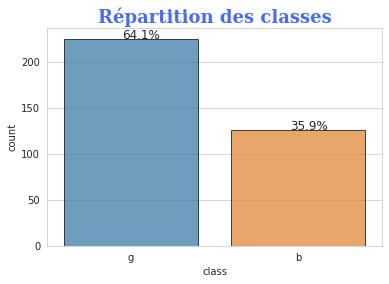

In [ ]:
total = float(len(df))

ax = sns.countplot(x="class", data=df,edgecolor="black",
              alpha=0.7)

plt.title(f"Répartition des classes",
          fontdict=font_title)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
plt.show()

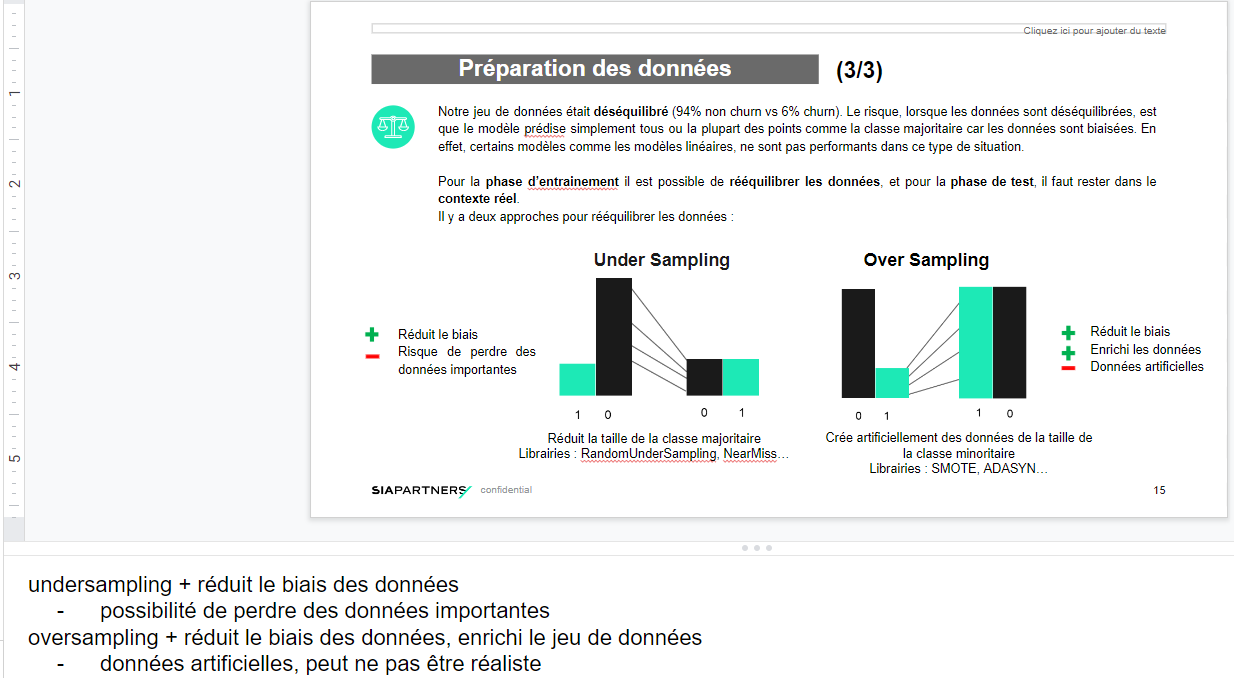

Nos données ne sont pas équilibré, il faudra le prendre en compte afin d'entrainer notre modèle de manière optimal. On va partir sur la solution d'over sampling car on a un petit dataset.

In [ ]:
df.describe()

a01    a02    a03    a04    a05    a06    a07    a08    a09    a10  \
count 351.00 351.00 351.00 351.00 351.00 351.00 351.00 351.00 351.00 351.00   
mean    0.64   0.04   0.60   0.12   0.55   0.12   0.51   0.18   0.48   0.16   
std     0.50   0.44   0.52   0.46   0.49   0.52   0.51   0.48   0.56   0.49   
min    -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00   
25%     0.47  -0.06   0.41  -0.02   0.21  -0.05   0.09  -0.05   0.02  -0.07   
50%     0.87   0.02   0.81   0.02   0.73   0.01   0.68   0.02   0.67   0.03   
75%     1.00   0.19   1.00   0.33   0.97   0.45   0.95   0.53   0.96   0.48   
max     1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   

       ...    a23    a24    a25    a26    a27    a28    a29    a30    a31  \
count  ... 351.00 351.00 351.00 351.00 351.00 351.00 351.00 351.00 351.00   
mean   ...   0.40  -0.07   0.54  -0.07   0.38  -0.03   0.35  -0.00   0.35   
std    ...   0.58   0.51   0.52   0.55   0.58   0.51   0.57   0.51   0.52   
min    ...  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00   
25%    ...   0.00  -0.33   0.29  -0.44   0.00  -0.24   0.00  -0.24   0.00   
50%    ...   0.55  -0.02   0.71  -0.02   0.50   0.00   0.44   0.00   0.41   
75%    ...   0.91   0.16   1.00   0.15   0.88   0.15   0.86   0.20   0.81   
max    ...   1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   

         a32  
count 351.00  
mean    0.01  
std     0.47  
min    -1.00  
25%    -0.17  
50%     0.00  
75%     0.17  
max     1.00  

[8 rows x 32 columns]

In [ ]:
for i in df.columns:
  i = str(i)
  count = (df[i] == 0).sum()
  print('Count of zeros in Column', str(i), ': ', count)

Count of zeros in Column a01 :  25
Count of zeros in Column a02 :  30
Count of zeros in Column a03 :  38
Count of zeros in Column a04 :  46
Count of zeros in Column a05 :  37
Count of zeros in Column a06 :  39
Count of zeros in Column a07 :  32
Count of zeros in Column a08 :  39
Count of zeros in Column a09 :  28
Count of zeros in Column a10 :  37
Count of zeros in Column a11 :  31
Count of zeros in Column a12 :  37
Count of zeros in Column a13 :  39
Count of zeros in Column a14 :  45
Count of zeros in Column a15 :  25
Count of zeros in Column a16 :  30
Count of zeros in Column a17 :  24
Count of zeros in Column a18 :  34
Count of zeros in Column a19 :  36
Count of zeros in Column a20 :  37
Count of zeros in Column a21 :  27
Count of zeros in Column a22 :  32
Count of zeros in Column a23 :  24
Count of zeros in Column a24 :  27
Count of zeros in Column a25 :  0
Count of zeros in Column a26 :  4
Count of zeros in Column a27 :  30
Count of zeros in Column a28 :  33
Count of zeros in Colu

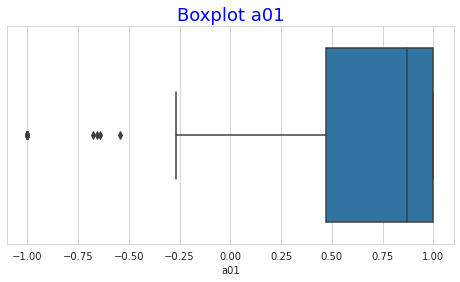

In [ ]:
fig = plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="a01")
plt.title("Boxplot a01", fontsize=18, color="b")
plt.show()

In [ ]:
# plot correlation heatmap to find out correlations

df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

# **2) Construisez une foret aléatoire**

## **Creation des jeux de données train/test et correction du déséquilibre de notre jeu de données.**

In [ ]:
# On crée notre jeu de données train et test avec une proportion 70-30

y = df[['class']]
X =  df.drop(columns=['class'])


X_train, X_test, y_train, y_test = train_test_split(X,
    y,test_size=0.3,
    shuffle=True,       #on mélange nos données avant de faire nos data test et data train                
    random_state=seed)                                 


In [ ]:
X_test

a01   a02  a03   a04  a05   a06   a07   a08   a09   a10  ...   a23  \
44   0.99 -0.06 1.00 -0.13 0.99 -0.19  0.99 -0.26  0.93 -0.30  ...  0.68   
7    0.00  0.00 0.00  0.00 1.00 -1.00  0.00  0.00 -1.00 -1.00  ...  1.00   
253  0.88  0.43 0.60  0.78 0.20  0.95 -0.24  0.93 -0.63  0.71  ...  0.56   
222  1.00 -1.00 1.00  1.00 1.00 -1.00  1.00  1.00  1.00 -1.00  ...  1.00   
90   0.88 -0.22 1.00  0.36 0.82  0.19  0.85  0.06  0.91 -0.04  ...  0.57   
..    ...   ...  ...   ...  ...   ...   ...   ...   ...   ...  ...   ...   
331  0.74  0.11 0.89  0.01 0.89  0.01  0.87 -0.01  0.73  0.11  ...  0.87   
80   1.00 -0.07 1.00  0.63 1.00  0.10  1.00  0.20  1.00 -1.00  ...  1.00   
281  0.94  0.20 0.96  0.41 0.81  0.57  0.57  0.71  0.42  0.83  ... -0.69   
9   -0.02 -0.08 0.00  0.00 0.00  0.00  0.11 -0.27 -0.46 -0.38  ... -0.15   
29  -1.00 -1.00 1.00  1.00 1.00 -1.00 -1.00  1.00  1.00 -1.00  ...  1.00   

      a24   a25   a26   a27   a28   a29   a30   a31   a32  
44  -0.68  0.65 -0.73  0.61 -0.75  0.55 -0.80  0.49 -0.83  
7    1.00  1.00  1.00  0.00  0.00  1.00  1.00  0.00  0.00  
253 -0.56  0.72 -0.24  0.72  0.10  0.58  0.39  0.35  0.58  
222 -1.00  1.00 -1.00  1.00  1.00  1.00 -1.00  1.00  1.00  
90   0.52  0.70  0.53  0.81  0.59  0.43  0.71  0.52  0.54  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
331  0.11  0.83  0.06  0.74 -0.04  0.82  0.07  0.81  0.07  
80  -0.58  1.00 -0.81  1.00 -1.00  1.00 -0.79  1.00 -0.48  
281  0.31 -0.77  0.16 -0.75 -0.04 -0.75 -0.18 -0.67 -0.34  
9   -0.01  0.21 -0.02  0.00  0.00  0.17  0.24 -0.08  0.38  
29   1.00  1.00 -1.00  1.00 -1.00 -1.00  1.00  1.00 -1.00  

[106 rows x 32 columns]

In [ ]:
X_train

a01   a02   a03  a04  a05   a06   a07   a08   a09   a10  ...   a23  \
213  1.00  0.14  1.00 0.71 1.00  0.71  1.00 -0.14  0.86 -0.14  ...  0.29   
230  0.00  0.00  0.00 0.00 0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
295  0.47  0.11  0.59 0.01 0.55  0.07  0.48 -0.14  0.53  0.01  ...  0.41   
186  1.00  1.00  0.00 0.00 1.00 -1.00 -1.00 -1.00  1.00  1.00  ... -1.00   
93  -0.54  0.15 -0.34 0.73 0.52 -0.14  0.32 -0.07  0.21 -0.15  ...  1.00   
..    ...   ...   ...  ...  ...   ...   ...   ...   ...   ...  ...   ...   
204  0.00  0.00 -1.00 1.00 1.00  1.00 -1.00 -1.00  0.00  0.00  ...  1.00   
53  -0.68 -1.00 -1.00 1.00 1.00  0.63  0.04 -1.00 -1.00 -1.00  ... -0.19   
294  0.75 -0.13  0.54 0.17 0.73  0.09  0.70 -0.11  0.67 -0.24  ...  0.67   
211  0.45  0.09  0.64 0.09 0.27  0.18  0.64  0.00  0.36 -0.09  ...  0.36   
303  0.94 -0.02  0.94 0.01 0.95 -0.01  0.96 -0.01  0.95 -0.04  ...  0.92   

      a24   a25   a26   a27   a28   a29   a30  a31   a32  
213 -0.29  1.00  0.05  1.00  0.05  1.00  0.57 1.00  0.00  
230  0.00  1.00  1.00  0.00  0.00  0.00  0.00 0.00  0.00  
295 -0.20  0.54 -0.11  0.60 -0.03  0.54 -0.12 0.56 -0.04  
186 -1.00  1.00  1.00 -1.00  1.00 -1.00  1.00 0.00  0.00  
93   0.66  0.41 -0.40 -0.15  0.11  0.02  0.56 0.53 -0.09  
..    ...   ...   ...   ...   ...   ...   ...  ...   ...  
204 -1.00 -1.00 -1.00  0.00  0.00  1.00 -1.00 0.00  0.00  
53   1.00  1.00 -1.00 -1.00 -1.00 -1.00  1.00 1.00  0.34  
294 -0.10  0.62 -0.12  0.60 -0.21  0.38  0.07 0.61 -0.01  
211 -0.09  0.34 -0.02  0.27  0.00  0.36  0.00 0.29 -0.02  
303 -0.04  0.93 -0.06  0.90 -0.07  0.92 -0.07 0.92 -0.07  

[245 rows x 32 columns]

In [ ]:

# On ajoute cette fonction qui nous donnera le score
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Résultat Train :\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Résultat Test :\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## **Mise en place de notre modèle**

### **Notre premier modèle**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# on crée un forêt contenant 100 arbres / on utilise le boostrap / gini est fonction d'impuretée / on ne fixe aucun maximum de profondeur
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=True, criterion='gini', max_depth=None, class_weight={'g':0.641, 'b':0.309}) 
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Résultat Train :
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              b      g  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   85.00 160.00      1.00     245.00        245.00
_______________________________________________
Confusion Matrix: 
 [[ 85   0]
 [  0 160]]

Résultat Test :
Accuracy Score: 96.23%
_______________________________________________
CLASSIFICATION REPORT:
              b     g  accuracy  macro avg  weighted avg
precision  0.91  1.00      0.96       0.96          0.97
recall     1.00  0.94      0.96       0.97          0.96
f1-score   0.95  0.97      0.96       0.96          0.96
support   41.00 65.00      0.96     106.00        106.00
_______________________________________________
Confusion Matrix: 
 [[41  0]
 [ 4 61]]



Important à dire : on ajoute le class_weight pour prendre en compte que notre jeu de données est inéquilibré.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

0.9717881944444444

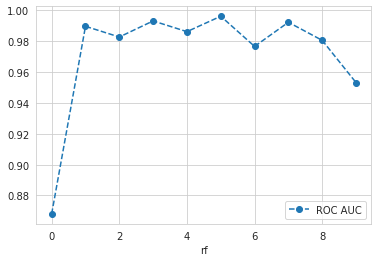

In [ ]:
scores = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='roc_auc') #10 fold cross validation 
df = pd.DataFrame(data={'rf': range(10), 'ROC AUC':scores})
df.plot(x='rf', y='ROC AUC', marker='o', linestyle='--')
scores.mean()

### Amélioration de notre modèle avec la méthode *Grid* search cross validation **texte en gras**

In [ ]:
rf_clf.get_params() # avant de l'améliorer on peut regarder les paramètres actuels de notre modèle

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {'g': 0.641, 'b': 0.309},
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
get_depth=[estimator.tree_.max_depth for estimator in rf_clf.estimators_] # etant donne que le parametre est None je recupère comme ça la max deph de mon modèle
max(get_depth)

16

In [ ]:
#definition des paramètres que l'on va tester dans la Grid search cross validation
n_estimators = [int(x) for x in np.linspace(start=5, stop=100, num=8)]
max_features = ['auto', 'sqrt'] # Il s'agit du nombre maximum de caractéristiques que Random Forest est autorisé à essayer dans un arbre individuel.
max_depth = [int(x) for x in np.linspace(2, 20, num=8)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

In [ ]:

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
rf_clf = RandomForestClassifier(random_state=seed, class_weight={'g':0.641, 'b':0.309})
# verbose de 1 à 3: controle le nb de message affiché / 3 est le max de msg
# n_jobs : nombre de job executer en parallele
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="roc_auc", cv=3, verbose=2, n_jobs=-1) # on baisse la cv à 3 car le 10 d'avant prend trop de temps


In [ ]:
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
Best parameters: {'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [ ]:
#On entraine notre modèle avec les hyperparamètre trouvés
rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Résultat Train :
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              b      g  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   85.00 160.00      1.00     245.00        245.00
_______________________________________________
Confusion Matrix: 
 [[ 85   0]
 [  0 160]]

Résultat Test :
Accuracy Score: 96.23%
_______________________________________________
CLASSIFICATION REPORT:
              b     g  accuracy  macro avg  weighted avg
precision  0.91  1.00      0.96       0.96          0.97
recall     1.00  0.94      0.96       0.97          0.96
f1-score   0.95  0.97      0.96       0.96          0.96
support   41.00 65.00      0.96     106.00        106.00
_______________________________________________
Confusion Matrix: 
 [[41  0]
 [ 4 61]]



A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

0.97265625

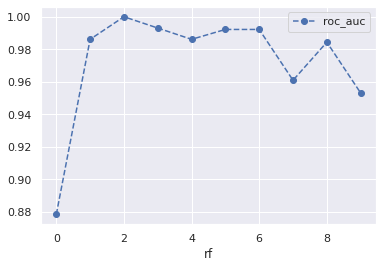

In [ ]:
scores = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='roc_auc') #10 fold cross validation 
df = pd.DataFrame(data={'rf': range(10), 'roc_auc':scores})
df.plot(x='rf', y='roc_auc', marker='o', linestyle='--')
scores.mean()

On voit que la moyenne est meilleure

# **3) Isolation Forest**

## **Réalisation du modèle**

In [ ]:
clf_isolation=IsolationForest(contamination=0.05,random_state=seed, verbose=0)
clf_isolation.fit(X_train)
pred = clf_isolation.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



In [ ]:
pred

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1])

In [ ]:
(pred>0).mean()

0.9245283018867925

In [ ]:
scores = clf_isolation.decision_function(X_test)
X_test_with_score = X_test.copy()
X_test_with_score["score"]=scores
X_test_with_score = X_test_with_score.sort_values("score")
X_test_with_score.head(-5) # on obtient ainsi les 5 valeurs ave l'index max le plus élevé

a01   a02   a03   a04   a05   a06   a07   a08   a09   a10  ...   a24  \
206 -1.00  1.00 -1.00  0.15  0.28  1.00 -1.00  1.00 -1.00 -1.00  ... -1.00   
220  1.00 -1.00 -1.00  1.00 -1.00  1.00  1.00  1.00  1.00  1.00  ...  0.00   
55   0.08 -0.21 -1.00  1.00 -1.00  1.00  0.72  0.47 -0.82 -0.63  ...  0.24   
166  0.00  0.00 -1.00 -1.00 -1.00  1.00  0.00  0.00 -1.00  1.00  ...  0.44   
162  1.00 -1.00  1.00  1.00 -1.00  1.00  1.00 -1.00  1.00 -1.00  ... -1.00   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
129  0.97  0.01  1.00  0.01  0.99 -0.01  0.98 -0.03  1.00 -0.04  ... -0.05   
322  0.90  0.02  1.00 -0.02  0.90  0.01  0.85  0.06  1.00  0.04  ...  0.05   
331  0.74  0.11  0.89  0.01  0.89  0.01  0.87 -0.01  0.73  0.11  ...  0.11   
289  0.75  0.03  0.99  0.10  0.76  0.13  0.74 -0.09  0.96  0.02  ... -0.01   
344  0.76  0.01  0.86  0.00  0.86  0.00  0.80  0.02  0.82  0.12  ... -0.00   

      a25   a26   a27   a28   a29   a30   a31   a32  score  
206 -1.00 -0.04  1.00 -1.00 -1.00 -0.32  0.15  1.00  -0.05  
220  1.00 -1.00  1.00 -1.00 -1.00  1.00 -1.00  1.00  -0.05  
55   1.00 -1.00 -1.00 -0.39 -1.00 -1.00 -1.00  0.61  -0.04  
166  1.00 -1.00  0.00  0.00 -1.00 -1.00 -1.00  1.00  -0.04  
162  1.00  1.00  1.00  1.00 -1.00  1.00 -1.00  1.00  -0.04  
..    ...   ...   ...   ...   ...   ...   ...   ...    ...  
129  0.99 -0.03  0.97 -0.02  1.00 -0.04  0.98 -0.04   0.24  
322  0.94  0.03  0.95  0.02  1.00  0.01  0.94  0.02   0.24  
331  0.83  0.06  0.74 -0.04  0.82  0.07  0.81  0.07   0.24  
289  0.82  0.03  0.72 -0.01  0.90  0.11  0.73  0.03   0.24  
344  0.71  0.01  0.66  0.01  0.66  0.01  0.64  0.02   0.25  

[101 rows x 33 columns]

## **Interprétation de notre modèle**

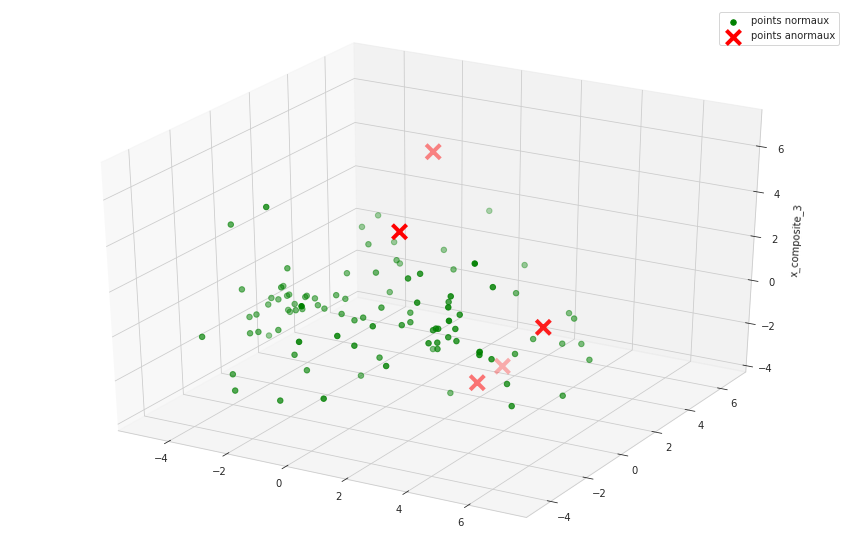

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
X_test_sort = X_test_with_score.copy().drop('score', axis=1)
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
outlier_index = [0,1,2,3,4]
pts_normaux = [i for i in range(5,len(X_test_sort)-1)]
#normalize the metrics
X = scaler.fit_transform(X_test_sort)
X_reduce = pca.fit_transform(X)

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[pts_normaux, 0], X_reduce[pts_normaux, 1], zs=X_reduce[pts_normaux, 2], s=30, lw=1, label="points normaux",c="green")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=4, s=200, marker="x", c="red", label="points anormaux")
ax.legend()
plt.show()

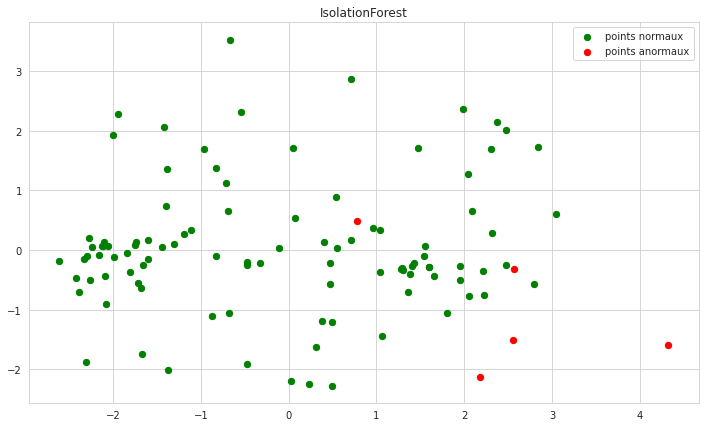

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(X_test_sort)
outlier_index = [0,1,2,3,4]
pts_normaux = [i for i in range(5,len(X_test_sort)-1)]


res=pd.DataFrame(pca.transform(X_test_sort))

Z = np.array(res)
figsize=(12, 7)
plt.figure(figsize=figsize)
plt.title("IsolationForest")

b1 = plt.scatter(res.iloc[pts_normaux,0], res.iloc[pts_normaux,1], c='green',
                 s=40,label="points normaux")

b1 = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',
                 s=40,  edgecolor="red",label="points anormaux")
plt.legend(loc="upper right")
plt.show()

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 13.0 MB/s 


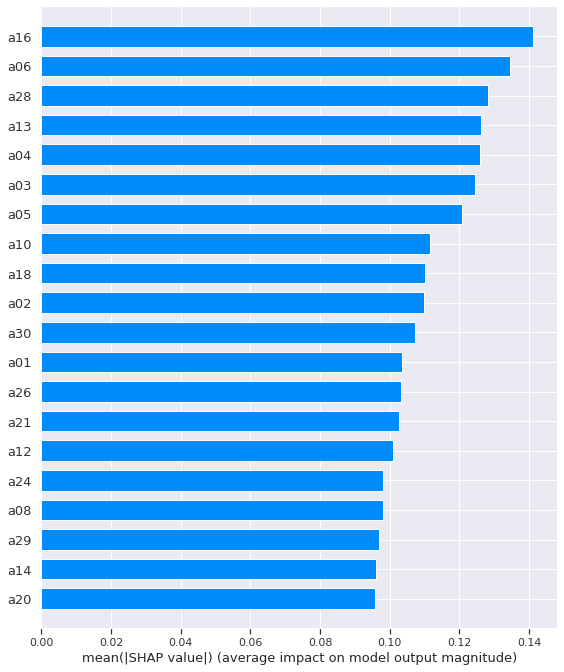

In [ ]:
import shap
explainer = shap.TreeExplainer(clf_isolation)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

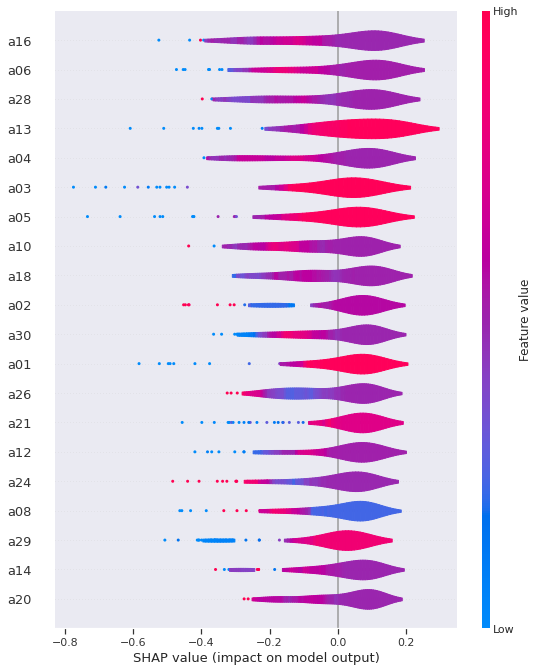

In [ ]:
plt.grid(False) 
shap.summary_plot(shap_values, X_test, plot_type="violin")

Pour comprendre un points anormal : 

In [ ]:
X_test_modif = X_test.copy()
X_test_modif =  X_test_modif.reset_index()
X_test_modif[X_test_modif["index"] == 206]
# la valeur 206 est  à la 38 eme postion dans notre dataset test utilise

index   a01  a02   a03  a04  a05  a06   a07  a08   a09  ...  a23   a24  \
38    206 -1.00 1.00 -1.00 0.15 0.28 1.00 -1.00 1.00 -1.00  ... 1.00 -1.00   

     a25   a26  a27   a28   a29   a30  a31  a32  
38 -1.00 -0.04 1.00 -1.00 -1.00 -0.32 0.15 1.00  

[1 rows x 33 columns]

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[38], X_test.loc[206])



comparaison avec points "normal"

In [ ]:
X_test_modif = X_test.copy()
X_test_modif =  X_test_modif.reset_index()
X_test_modif[X_test_modif["index"] == 344]


index  a01  a02  a03  a04  a05  a06  a07  a08  a09  ...  a23   a24  a25  \
33    344 0.76 0.01 0.86 0.00 0.86 0.00 0.80 0.02 0.82  ... 0.77 -0.00 0.71   

    a26  a27  a28  a29  a30  a31  a32  
33 0.01 0.66 0.01 0.66 0.01 0.64 0.02  

[1 rows x 33 columns]

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[33], X_test.loc[206])

# **4) ACP**

# ACP avec Sklearn

In [ ]:
df = X_train

In [ ]:
def centrer_data(matrice):
  return matrice.apply(lambda x: x -x.mean())

In [ ]:
def calcul_indicateurs_statistiques(matrice):
  resultat = {}
  resultat["ecart-type"]  = matrice.std()
  resultat["variance"]   = matrice.var()
  resultat["covariance"] = matrice.cov() 
  return resultat

Text(0.5, 1.0, 'Matrice de covariance')

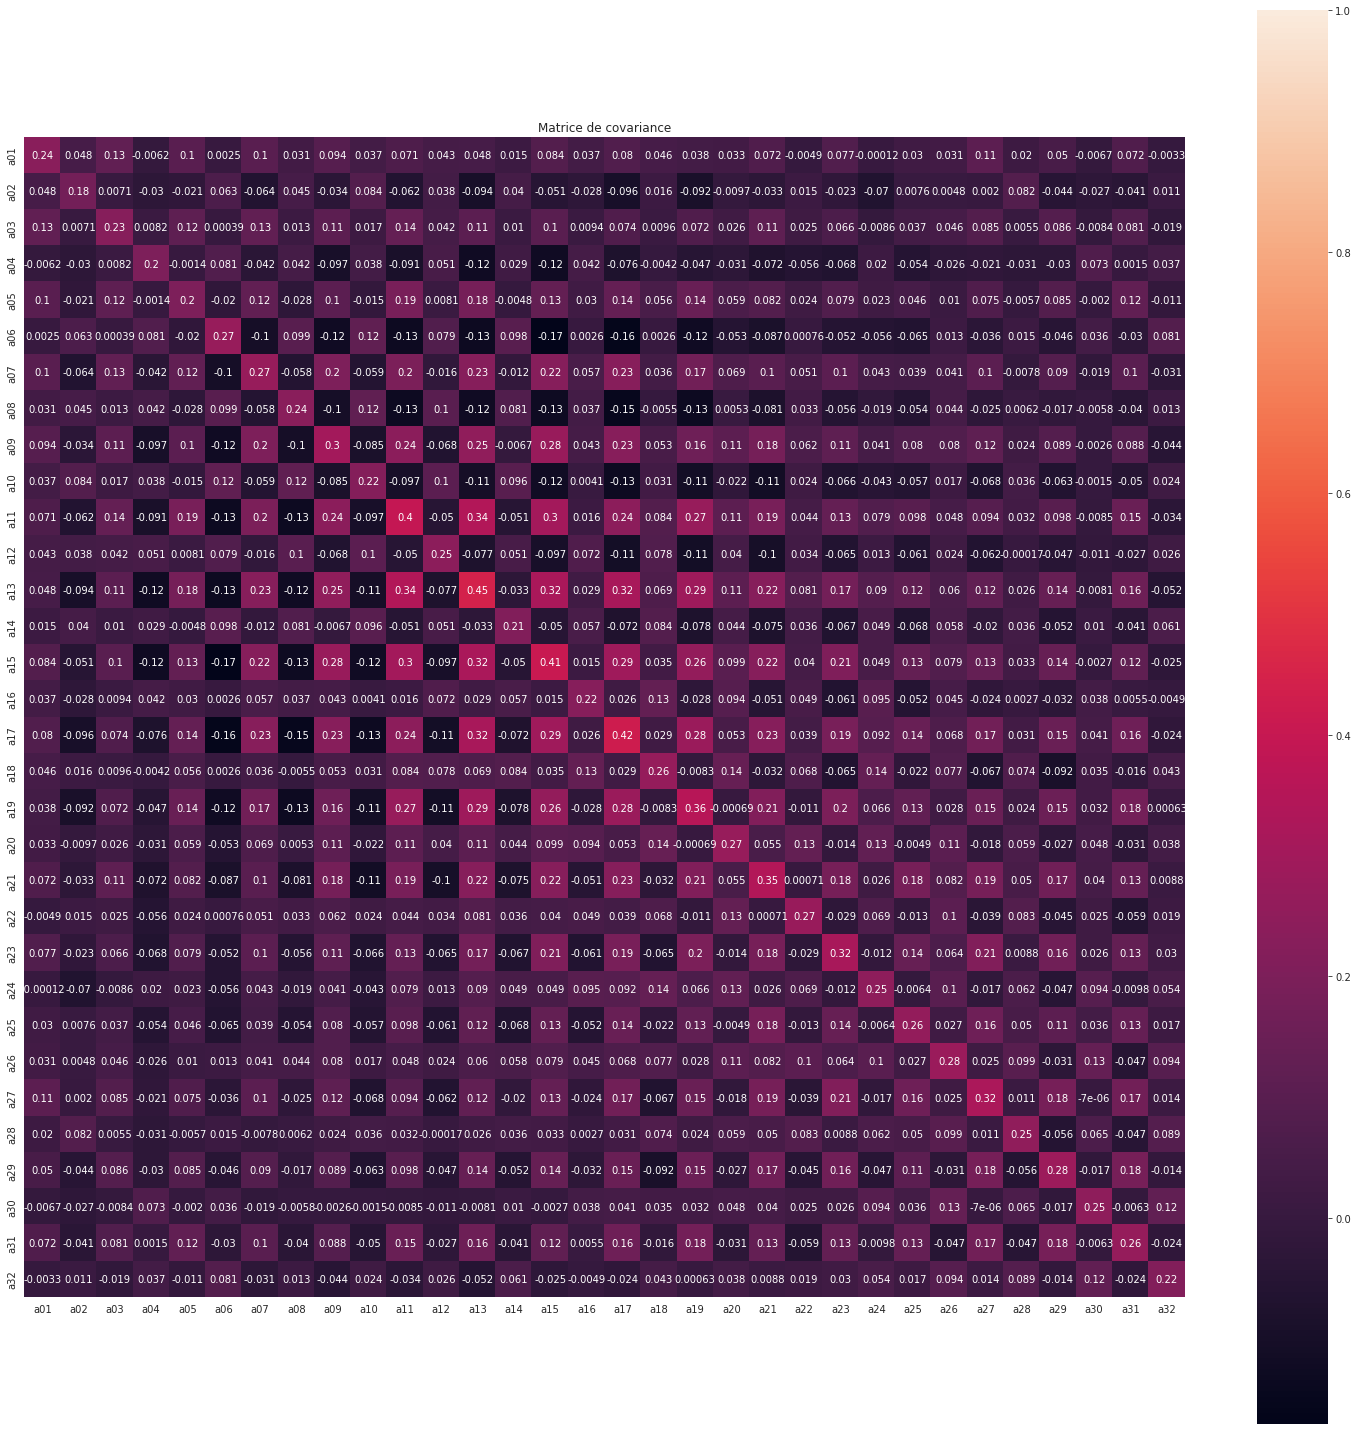

In [ ]:
resultats_indicateurs_stat  = calcul_indicateurs_statistiques(df)
 # on affiche la matrice de covariance pour l'exemple
plt.figure(figsize=(26,26))
sns.heatmap(resultats_indicateurs_stat["covariance"], vmax=1, square=True,annot=True)
plt.title('Matrice de covariance')

In [ ]:
df_centre = centrer_data(df)

In [ ]:
#vérification 
#moyenne
print(np.mean(df_centre,axis=0))

a01    0.00
a02   -0.00
a03    0.00
a04    0.00
a05    0.00
a06    0.00
a07   -0.00
a08    0.00
a09   -0.00
a10   -0.00
a11    0.00
a12   -0.00
a13   -0.00
a14    0.00
a15   -0.00
a16    0.00
a17    0.00
a18   -0.00
a19    0.00
a20    0.00
a21    0.00
a22    0.00
a23   -0.00
a24    0.00
a25   -0.00
a26    0.00
a27   -0.00
a28    0.00
a29    0.00
a30    0.00
a31   -0.00
a32    0.00
dtype: float64


## **Réalisation de l'ACP**

In [ ]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA()
#calculs
df_acp = acp.fit_transform(df_centre)
#nombre de composantes calculées
print(acp.n_components_) 

32


**Vecteur propre & Lambda**

In [ ]:
vecteur_propre = acp.components_ 
print(vecteur_propre)
#Axes principaux dans l'espace des caractéristiques, représentant les directions de variance maximale dans les données. 
#Équivalemment, les vecteurs singuliers droits des données d'entrée centrées, parallèles à ses vecteurs propres.
# Les composantes sont triées par importance de variable expliqué

[[-0.09191253  0.07392996 -0.12121692 ... -0.01306386 -0.17955871
   0.02541303]
 [ 0.06413964  0.02236732  0.05060178 ...  0.15342696 -0.16198307
   0.1286423 ]
 [ 0.29886575  0.19193778  0.24709183 ...  0.14562908  0.18484078
   0.22705384]
 ...
 [ 0.16280975 -0.31148745  0.14470937 ...  0.18829292 -0.08424191
  -0.35276502]
 [ 0.23085581  0.17491658 -0.10844732 ... -0.13770073 -0.0872242
   0.07401574]
 [ 0.02591411  0.12172997  0.33300913 ... -0.12872967  0.01451418
   0.2281224 ]]


In [ ]:
lambdas = acp.singular_values_ #Les valeurs singulières correspondant à chacune des composantes sélectionnées.
print(lambdas)

[26.84584595 16.38485155 13.27597172 12.31273488 10.67496328  8.76056906
  8.19448772  7.83570785  7.53830331  7.03567805  6.86962141  6.27665663
  6.09922875  5.69067706  5.5663569   5.30008206  5.23129995  4.70827938
  4.56474551  4.31149246  4.08582898  4.00942088  3.76810311  3.54216859
  3.43809709  3.26557838  3.20041672  2.87750525  2.76963531  2.59664181
  2.32507267  2.04028809]


On peut s'assurer que l'on a bien calculer toutes les composantes en regardant le pourcentage de variable expliqué ( qui devrait être de 100%).

In [ ]:
print("Variance expliquée par les 32 composantes principales = ", sum(acp.explained_variance_ratio_ * 100), "%")

Variance expliquée par les 32 composantes principales =  99.99999999999997 %


On peut afficher les variances expliqués par chacune des composantes principales :

In [ ]:
exp_var_acp = acp.explained_variance_ratio_
print(exp_var_acp)


[0.33191962 0.12364135 0.08117296 0.06982128 0.05248214 0.03534625
 0.0309259  0.02827712 0.02617134 0.02279768 0.02173423 0.0181441
 0.01713281 0.01491443 0.0142699  0.01293731 0.0126037  0.01020947
 0.00959648 0.00856119 0.00768846 0.00740358 0.00653919 0.00577853
 0.00544396 0.00491133 0.00471728 0.00381339 0.00353284 0.00310529
 0.00248973 0.00191717]


On peut regrouper toutes ces données dans un dataframe.

In [ ]:
list_acp = ["CP" + str(i) for i in range(1,33)]
df_acp_variance= pd.DataFrame(list_acp, columns = ["ACP"])
df_acp_variance['variance_explique'] = acp.explained_variance_
df_acp_variance

ACP  variance_explique
0    CP1               2.95
1    CP2               1.10
2    CP3               0.72
3    CP4               0.62
4    CP5               0.47
5    CP6               0.31
6    CP7               0.28
7    CP8               0.25
8    CP9               0.23
9   CP10               0.20
10  CP11               0.19
11  CP12               0.16
12  CP13               0.15
13  CP14               0.13
14  CP15               0.13
15  CP16               0.12
16  CP17               0.11
17  CP18               0.09
18  CP19               0.09
19  CP20               0.08
20  CP21               0.07
21  CP22               0.07
22  CP23               0.06
23  CP24               0.05
24  CP25               0.05
25  CP26               0.04
26  CP27               0.04
27  CP28               0.03
28  CP29               0.03
29  CP30               0.03
30  CP31               0.02
31  CP32               0.02

## **Analyse du modèle**

On va visualiser ces valeurs :

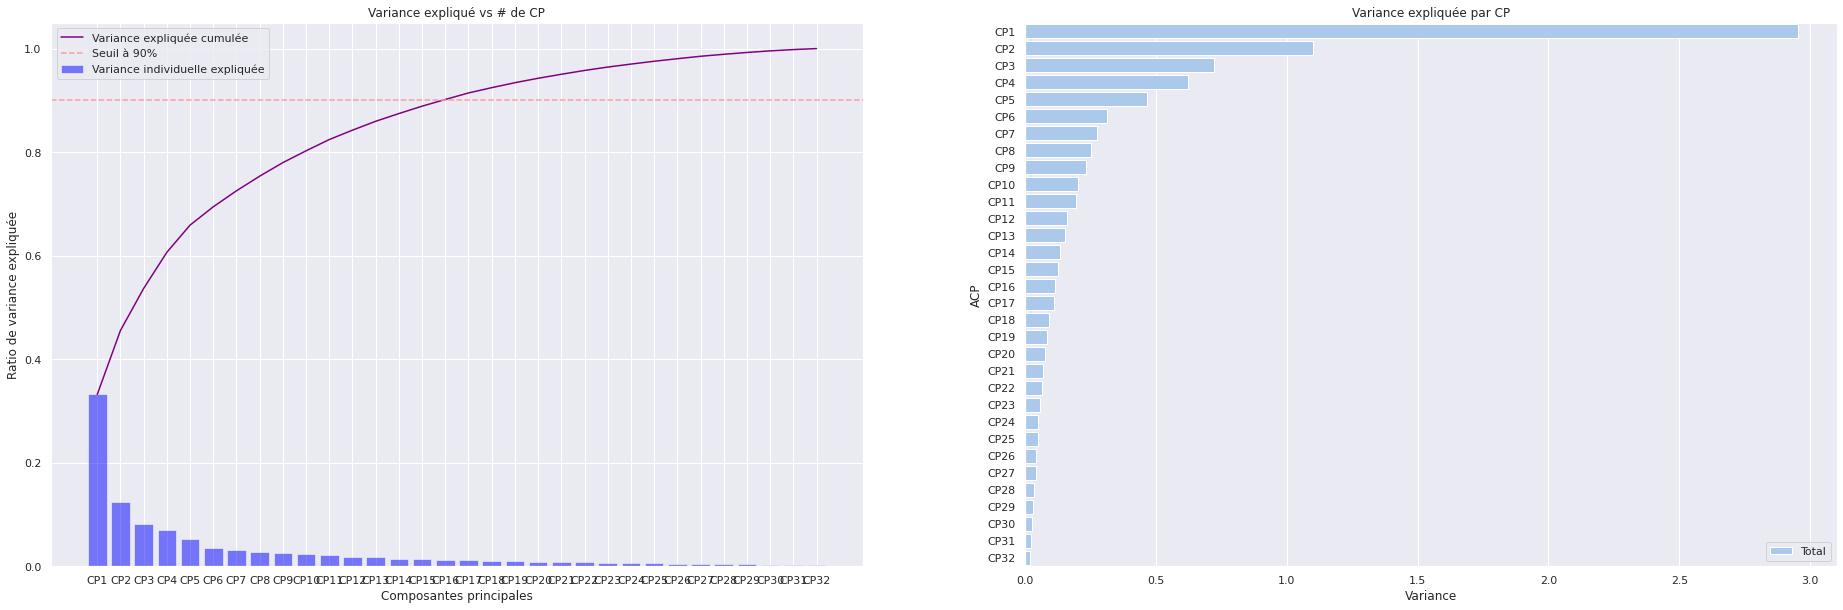

In [ ]:

# Somme cumulée des valeurs propre. Elle sera utilisé pour créer un step plot pour visualiser la variance expliquée par chaque composante principale.
sommme_cumule_var = np.cumsum(acp.explained_variance_ratio_)



sns.set(style="darkgrid")

# creation des deux graphes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (32, 10))

# definition du graphe un
sns.set_color_codes("pastel")
sns.barplot(x="variance_explique", y="ACP", data=df_acp_variance,
            label="Total", color="b")
ax2.set_title("Variance expliquée par CP")
ax2.set_xlabel("Variance")
ax2.legend(loc='best')

# definition du graphe deux
ax1.plot(list_acp,sommme_cumule_var, color="purple", label='Variance expliquée cumulée')
ax1.bar(range(0,len(exp_var_acp)), exp_var_acp, alpha=0.5, align='center', label='Variance individuelle expliquée', color='blue')
ax1.axhline(y = 0.9, color = 'r', linestyle = '--',label='Seuil à 90%')
ax1.set_title("Variance expliqué vs # de CP")
ax1.set_ylabel('Ratio de variance expliquée')
ax1.set_xlabel("Composantes principales")
ax1.legend(loc='best')

# on affiche
plt.show()

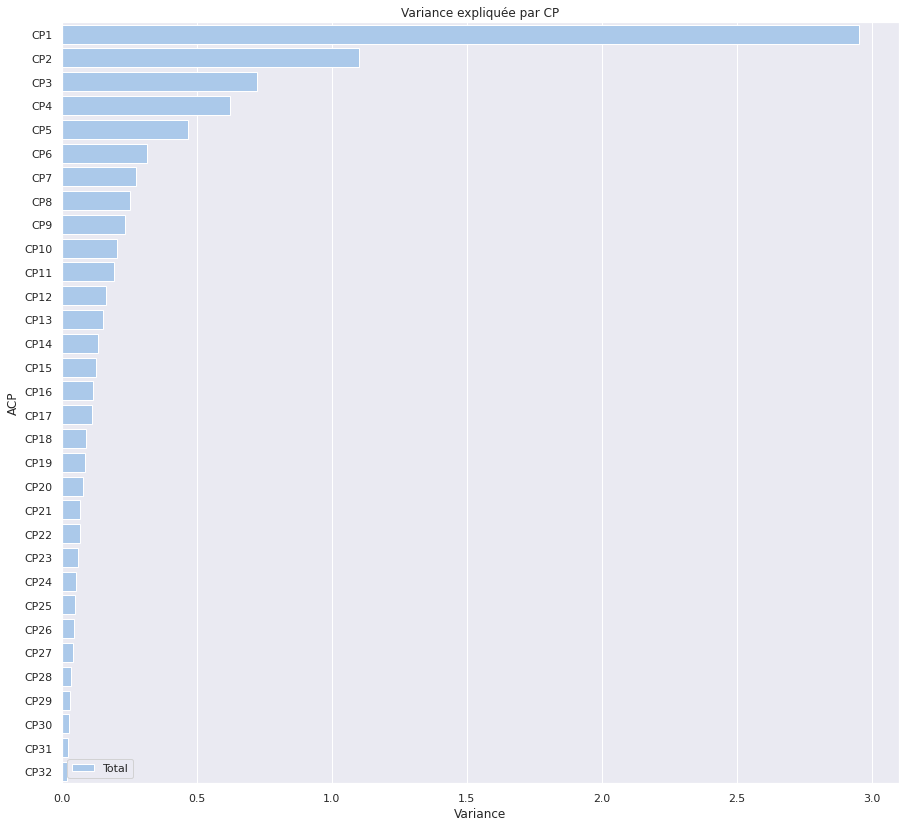

In [ ]:

# Somme cumulée des valeurs propre. Elle sera utilisé pour créer un step plot pour visualiser la variance expliquée par chaque composante principale.
sommme_cumule_var = np.cumsum(acp.explained_variance_ratio_)



sns.set(style="darkgrid")


fig = plt.figure(figsize=(15,14))

sns.set_color_codes("pastel")
sns.barplot(x="variance_explique", y="ACP", data=df_acp_variance,
            label="Total", color="b")
plt.title("Variance expliquée par CP")
plt.xlabel("Variance")
plt.legend(loc='best')


# on affiche
plt.show()

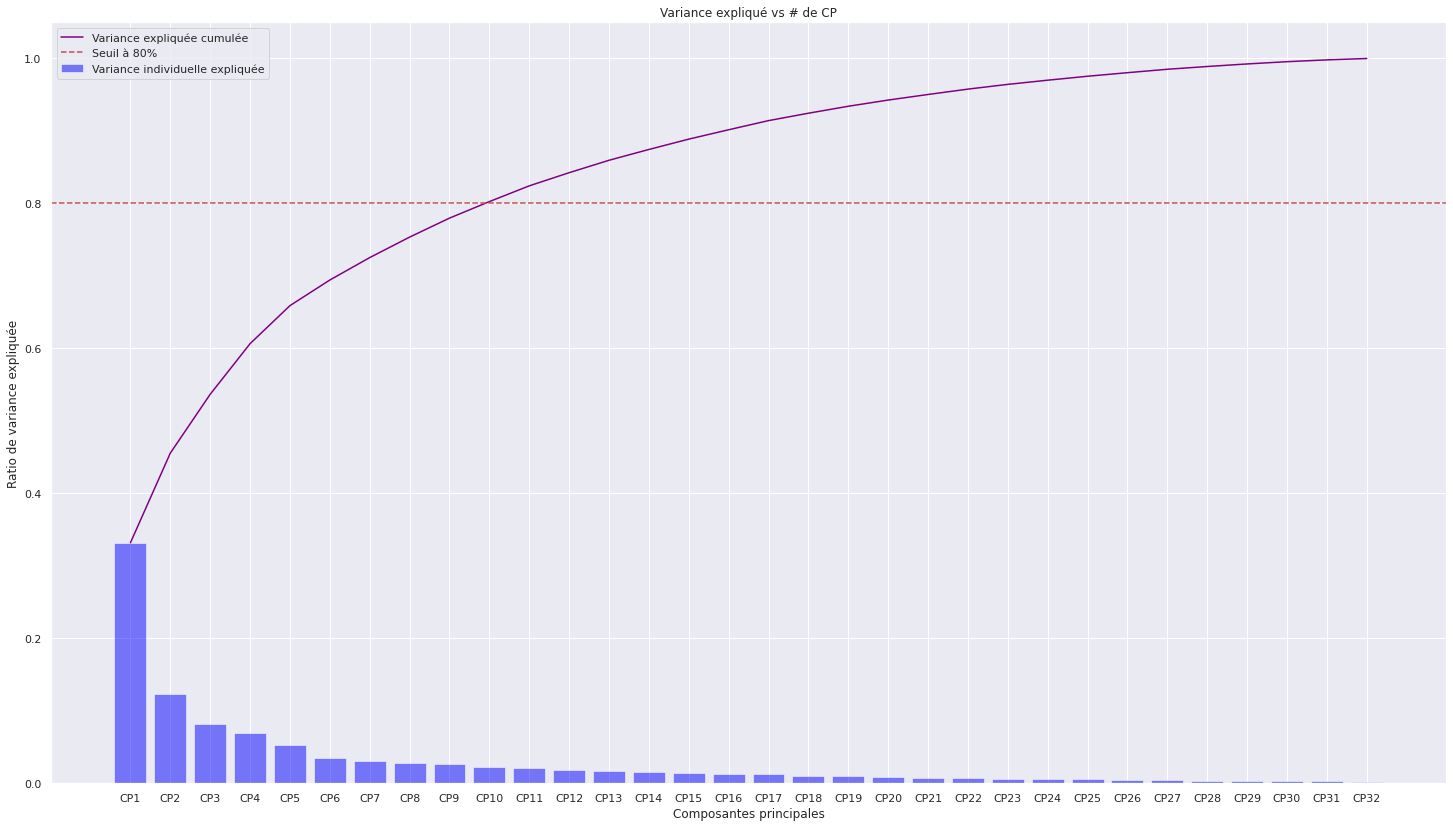

In [ ]:

# Somme cumulée des valeurs propre. Elle sera utilisé pour créer un step plot pour visualiser la variance expliquée par chaque composante principale.
sommme_cumule_var = np.cumsum(acp.explained_variance_ratio_)



sns.set(style="darkgrid")


fig = plt.figure(figsize=(25,14))

# definition du graphe deux
plt.plot(list_acp,sommme_cumule_var, color="purple", label='Variance expliquée cumulée')
plt.bar(range(0,len(exp_var_acp)), exp_var_acp, alpha=0.5, align='center', label='Variance individuelle expliquée', color='blue')
plt.axhline(y = 0.8, color = 'r', linestyle = '--',label='Seuil à 80%')
plt.title("Variance expliqué vs # de CP")
plt.ylabel('Ratio de variance expliquée')
plt.xlabel("Composantes principales")
plt.legend(loc='best')

# on affiche
plt.show()

Pour k = 10 on a 80% de la variance qui est expliquée

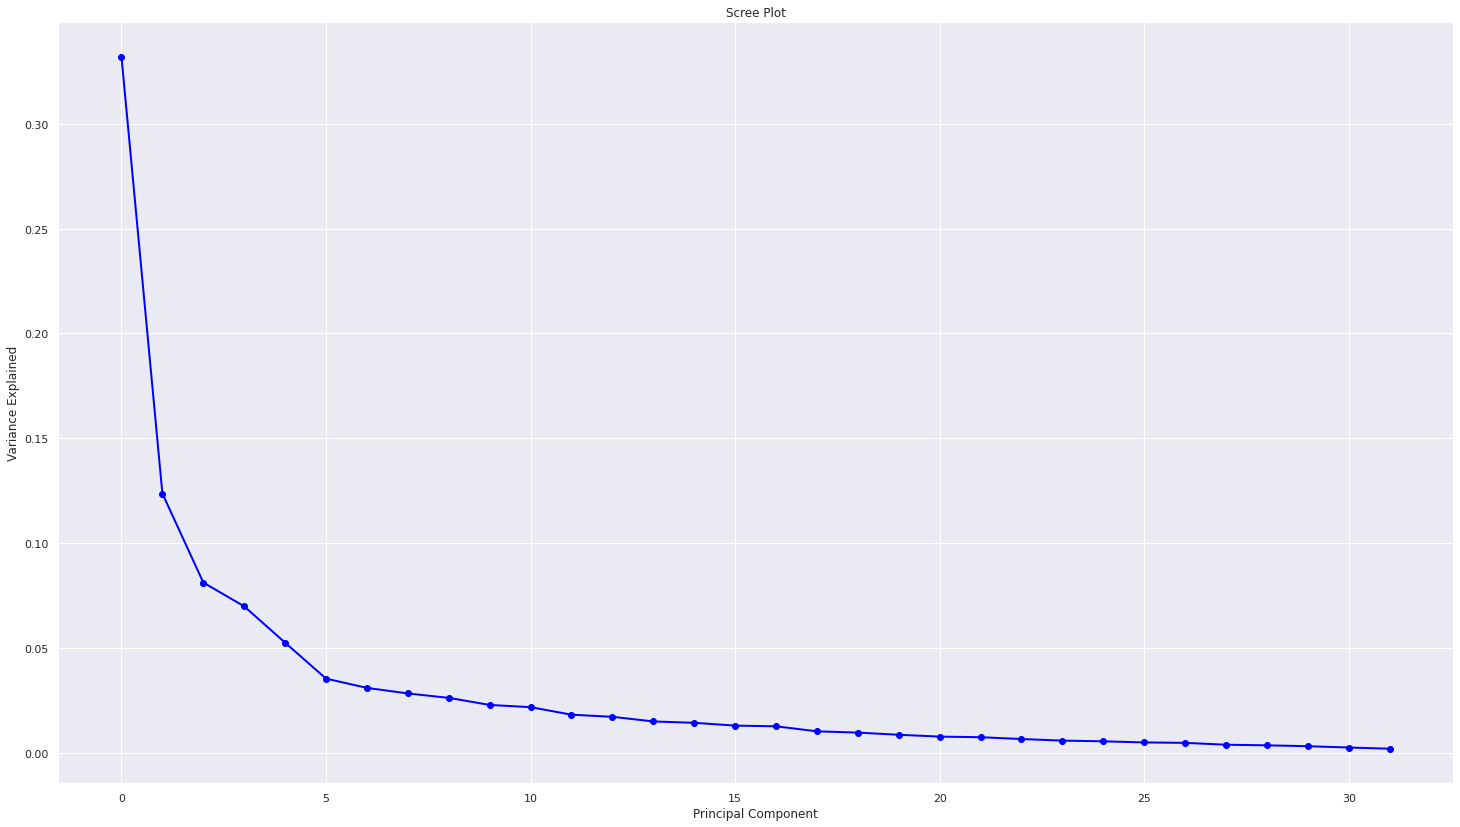

In [ ]:
sns.set(style="darkgrid")


fig = plt.figure(figsize=(25,14))

plt.plot(range(0,len(exp_var_acp)), exp_var_acp,'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
# on affiche
plt.show()

In [ ]:
#On prendra k de 10 à 12 pour traiter les cas centrée
#Vecteur_Propre= pd.DataFrame(acp["vecteur propre"],columns=["X" + str(i) for i in range(1,33)]) # matrice des vecteurs propres

Vecteur_Propre= pd.DataFrame(acp.components_,columns=["X" + str(i) for i in range(1,33)]) # matrice des vecteurs propres
X_centree = centrer_data(X_train) # matrice de nos donnees initiales centrees
n = X_centree.shape[0]
p = X_centree.shape[1]

Vecteur_Propre.shape
#Changement de Base 
X_centree_nouvelle_base = X_centree.dot(Vecteur_Propre.to_numpy())# .dot permet de faire le produit matriciel sur des dataframes

#Qualité de la projection cas centrée, on utilise la formule de l'énoncé

Qualité_individus_centree =  [[0]*n,[0]*n,[0]*n]

for k in range(9,12): 
  for i in range (0,n):
   denominateur = sum(X_centree_nouvelle_base.iloc[i]**2)
   numerateur = 0
   for j in range(0,k):
      numerateur  = numerateur + X_centree_nouvelle_base.iloc[i,j]**2
   Qualité_individus_centree[k-9][i] = numerateur/denominateur 


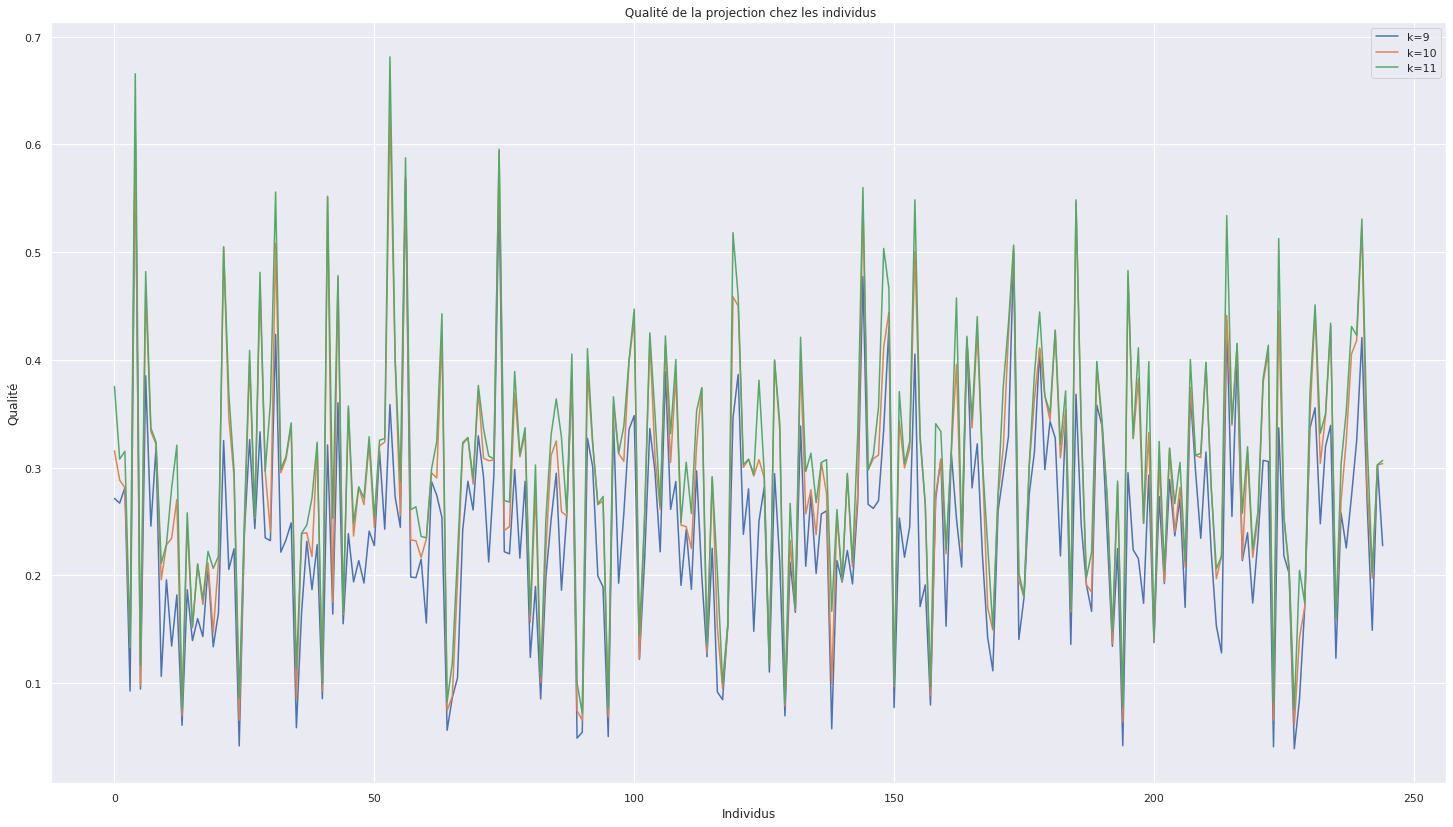

In [ ]:
#creation du graphique
fig = plt.figure(figsize=(25,14))
plt.plot(Qualité_individus_centree[0], label="k=9")
plt.plot(Qualité_individus_centree[1], label="k=10")
plt.plot(Qualité_individus_centree[2], label="k=11")
plt.title(" Qualité de la projection chez les individus")
plt.xlabel("Individus")
plt.ylabel("Qualité")
plt.legend(loc='best')




# **ACP avec Numpy et Pandas**

## **Réalisation de l'ACP**

In [ ]:
def centrer_data(matrice):
  return matrice.apply(lambda x: x -x.mean())

In [ ]:
#Normalisation en utilisant la librairie pandas (donne des estimations non biaisées)
def normer_data(matrice):
  return df.apply(lambda x: (x-x.mean())/ x.std())

**Recherche des hyperplans**

In [ ]:
def ACP(matrice):

  acp = {}

  matrice = centrer_data(matrice) # on centre nos données

  # on cacule la matrice de covariance que l'on covertit en array
  matrice_cov = np.array(calcul_indicateurs_statistiques(matrice)["covariance"]) 

  # on calcule les vectuers propre et lambdas, ils ne sont pas triés
  lambdas,vecteur_propre=np.linalg.eig(matrice_cov) 
  
  # On les trie dans le sens décroissant en fonction de la variance
  index = lambdas.argsort()[::-1] 
  lambdas = lambdas[index]
  vecteur_propre = vecteur_propre[index]

  # calcul des variables expliquées
  total_lambdas = sum(lambdas)
  ratio_var_explique = [(i/total_lambdas) for i in lambdas]

  acp["lambdas"] = lambdas
  acp["vecteur propre"] = vecteur_propre
  acp["ratio_var_explique"] = ratio_var_explique
 
  return acp



In [ ]:
df =X_train

In [ ]:
acp = ACP(df)
acp

{'lambdas': array([2.95368625, 1.10025967, 0.72234191, 0.62132557, 0.46702804,
        0.31453922, 0.2752034 , 0.25163245, 0.23289351, 0.20287199,
        0.1934086 , 0.16146073, 0.15246144, 0.13272051, 0.12698496,
        0.11512652, 0.11215778, 0.09085203, 0.08539714, 0.07618429,
        0.06841803, 0.06588302, 0.05819099, 0.05142196, 0.04844472,
        0.04370493, 0.04197814, 0.03393458, 0.03143803, 0.0276334 ,
        0.02215559, 0.01706056]),
 'vecteur propre': array([[ 0.09191253, -0.06413964,  0.29886575, ..., -0.17844661,
         -0.07053704,  0.01433799],
        [-0.07392996, -0.02236732,  0.19193778, ...,  0.46230926,
         -0.03351313,  0.21050915],
        [ 0.12121692, -0.05060178,  0.24709183, ...,  0.19263193,
          0.16472878, -0.02537257],
        ...,
        [ 0.15958596,  0.12411938,  0.16123268, ..., -0.07180514,
          0.17948381, -0.01110848],
        [ 0.02900168, -0.29590193, -0.02324878, ..., -0.08602213,
         -0.15995322, -0.0026857 ],
      

In [ ]:
list_acp = ["CP" + str(i) for i in range(1,33)]
df_acp_variance= pd.DataFrame(list_acp, columns = ["ACP"])
df_acp_variance['variance_explique'] = acp["lambdas"]
df_acp_variance

ACP  variance_explique
0    CP1               2.95
1    CP2               1.10
2    CP3               0.72
3    CP4               0.62
4    CP5               0.47
5    CP6               0.31
6    CP7               0.28
7    CP8               0.25
8    CP9               0.23
9   CP10               0.20
10  CP11               0.19
11  CP12               0.16
12  CP13               0.15
13  CP14               0.13
14  CP15               0.13
15  CP16               0.12
16  CP17               0.11
17  CP18               0.09
18  CP19               0.09
19  CP20               0.08
20  CP21               0.07
21  CP22               0.07
22  CP23               0.06
23  CP24               0.05
24  CP25               0.05
25  CP26               0.04
26  CP27               0.04
27  CP28               0.03
28  CP29               0.03
29  CP30               0.03
30  CP31               0.02
31  CP32               0.02

## **Analyse du modèle**

On va visualiser ces valeurs :

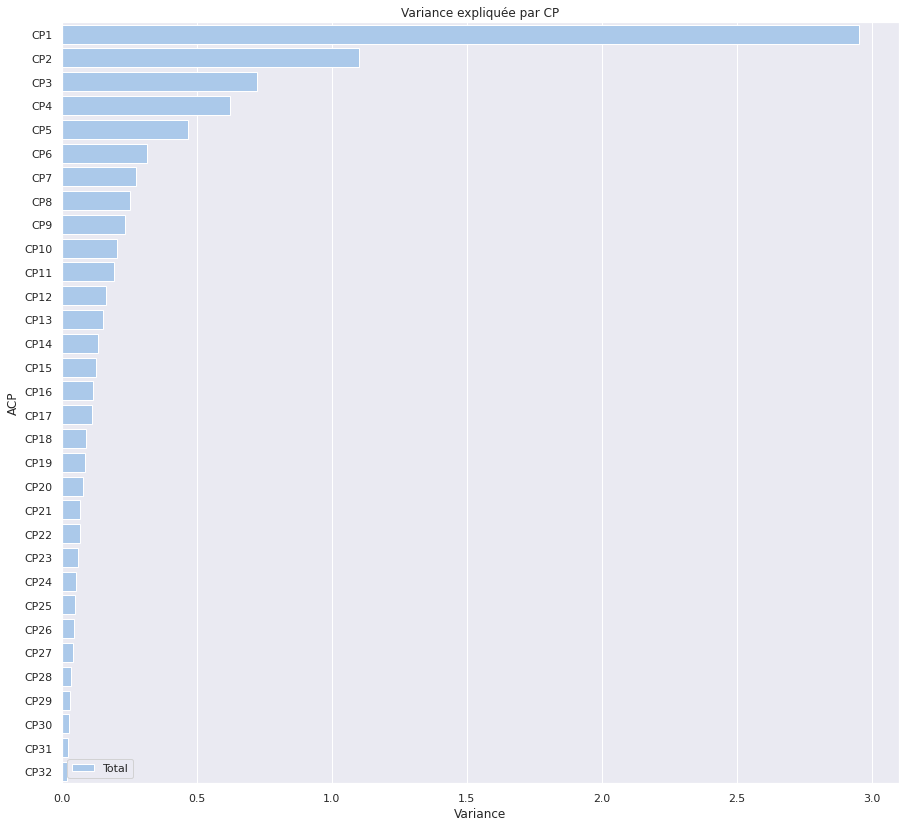

In [ ]:

# Somme cumulée des valeurs propre. Elle sera utilisé pour créer un step plot pour visualiser la variance expliquée par chaque composante principale.
sommme_cumule_var = np.cumsum(acp["ratio_var_explique"])



sns.set(style="darkgrid")


fig = plt.figure(figsize=(15,14))

sns.set_color_codes("pastel")
sns.barplot(x="variance_explique", y="ACP", data=df_acp_variance,
            label="Total", color="b")
plt.title("Variance expliquée par CP")
plt.xlabel("Variance")
plt.legend(loc='best')


# on affiche
plt.show()

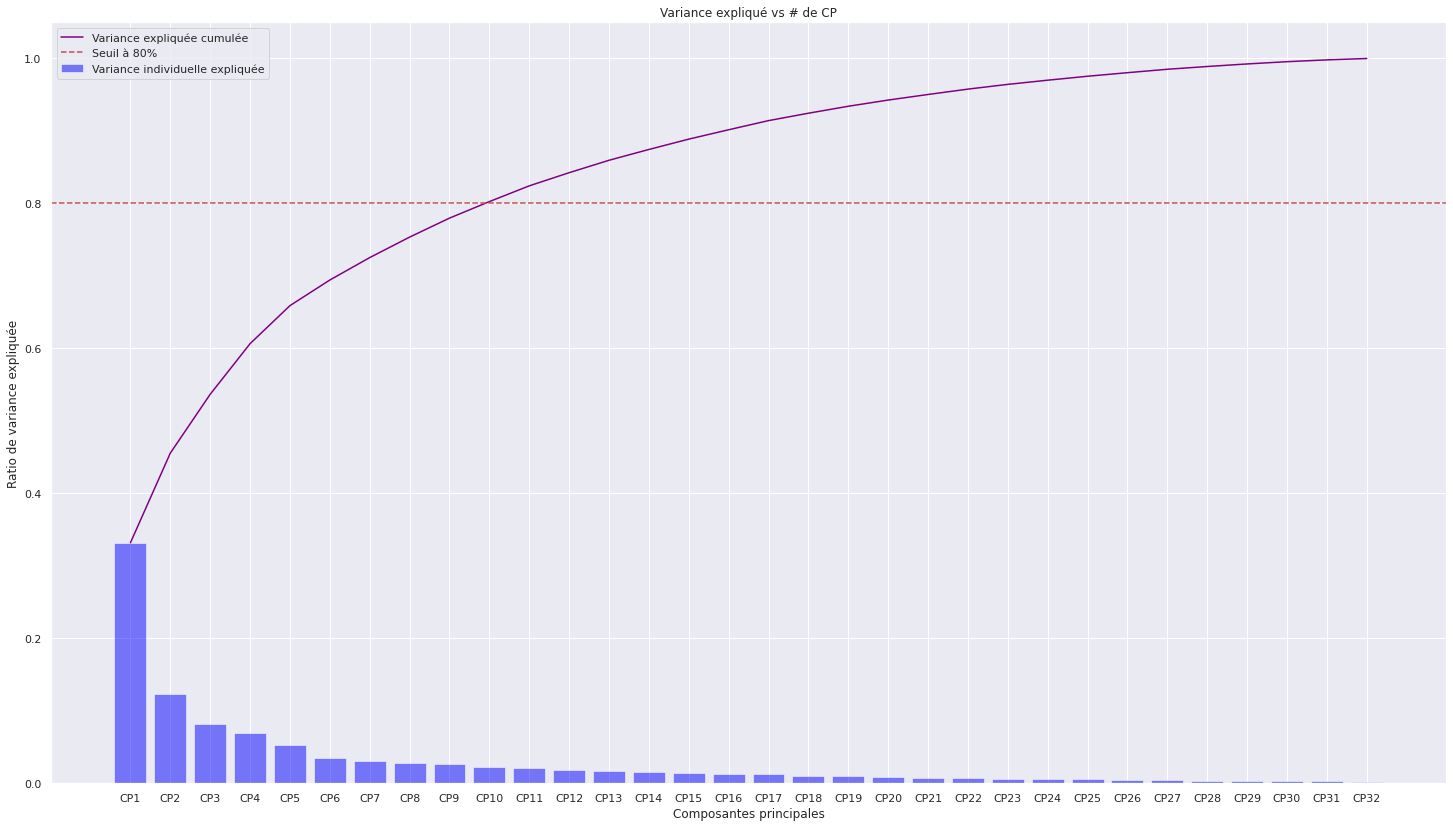

In [ ]:

# Somme cumulée des valeurs propre. Elle sera utilisé pour créer un step plot pour visualiser la variance expliquée par chaque composante principale.
sommme_cumule_var = np.cumsum(acp["ratio_var_explique"])



sns.set(style="darkgrid")


fig = plt.figure(figsize=(25,14))

# definition du graphe deux
plt.plot(list_acp,sommme_cumule_var, color="purple", label='Variance expliquée cumulée')
plt.bar(range(0,len(exp_var_acp)), exp_var_acp, alpha=0.5, align='center', label='Variance individuelle expliquée', color='blue')
plt.axhline(y = 0.8, color = 'r', linestyle = '--',label='Seuil à 80%')
plt.title("Variance expliqué vs # de CP")
plt.ylabel('Ratio de variance expliquée')
plt.xlabel("Composantes principales")
plt.legend(loc='best')

# on affiche
plt.show()

Pour k = 10 on a 80% de la variance qui est expliquée

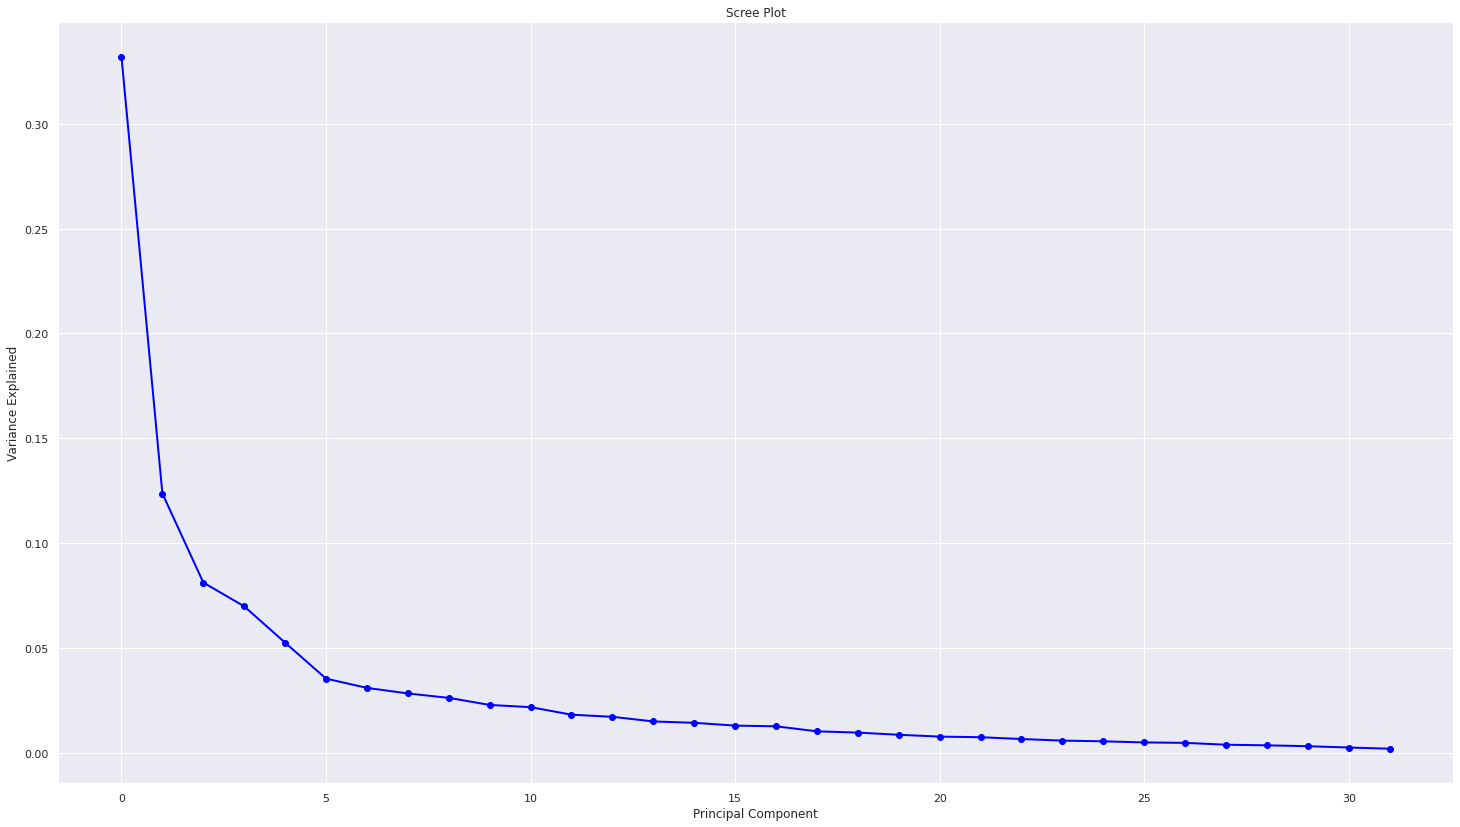

In [ ]:
sns.set(style="darkgrid")


fig = plt.figure(figsize=(25,14))

plt.plot(range(0,len(exp_var_acp)), exp_var_acp,'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
# on affiche
plt.show()

In [ ]:
#On prendra k de 9 à 11 pour traiter les cas centrée
Vecteur_Propre= pd.DataFrame(acp["vecteur propre"],columns=["X" + str(i) for i in range(1,33)]) # matrice des vecteurs propres

X_centree = centrer_data(X_train) # matrice de nos donnees initiales centrees
n = X_centree.shape[0]
p = X_centree.shape[1]

Vecteur_Propre.shape
#Changement de Base 
X_centree_nouvelle_base = X_centree.dot(Vecteur_Propre.to_numpy())# .dot permet de faire le produit matriciel sur des dataframes

#Qualité de la projection cas centrée, on utilise la formule de l'énoncé

Qualité_individus_centree =  [[0]*n,[0]*n,[0]*n]

for k in range(9,12): 
  for i in range (0,n):
   denominateur = sum(X_centree_nouvelle_base.iloc[i]**2)
   numerateur = 0
   for j in range(0,k):
      numerateur  = numerateur + X_centree_nouvelle_base.iloc[i,j]**2
   Qualité_individus_centree[k-9][i] = numerateur/denominateur 


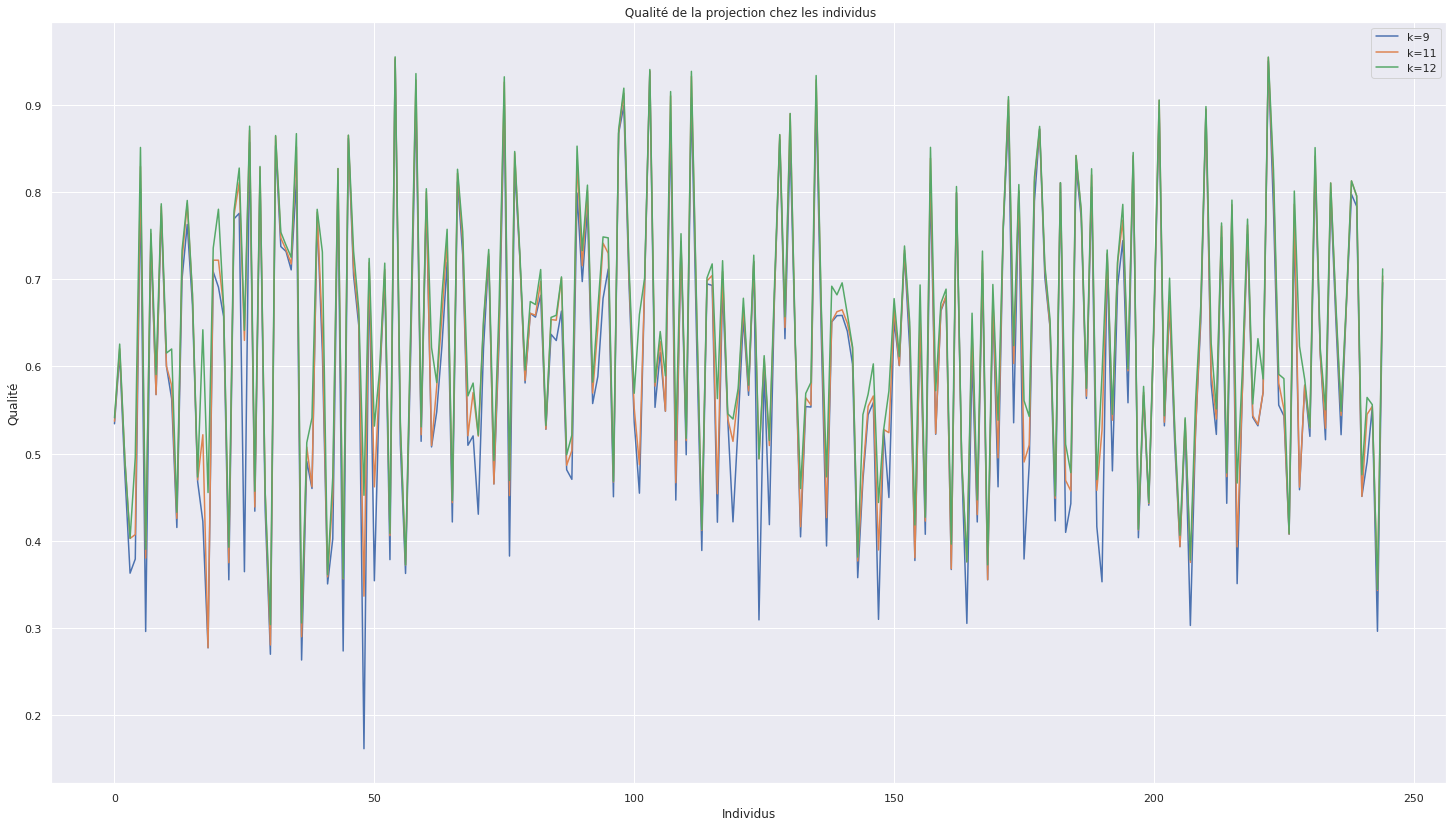

In [ ]:
#creation du graphique
fig = plt.figure(figsize=(25,14))
plt.plot(Qualité_individus_centree[0], label="k=9")
plt.plot(Qualité_individus_centree[1], label="k=11")
plt.plot(Qualité_individus_centree[2], label="k=12")
plt.title(" Qualité de la projection chez les individus")
plt.xlabel("Individus")
plt.ylabel("Qualité")
plt.legend(loc='best')




In [ ]:
Vecteur_Propre= pd.DataFrame(acp["vecteur propre"],columns=["X" + str(i) for i in range(1,33)]) # matrice des vecteurs propres
X_centree = centrer_data(df) # matrice de nos donnees initiales centrees
n = X_centree.shape[0]
p = X_centree.shape[1]

#Changement de Base 
X_centree_nouvelle_base = X_centree.dot(Vecteur_Propre.to_numpy())# .dot permet de faire le produit matriciel sur des dataframes


ContributionCentrée = np.zeros((n,p))
for i in range(0,n):
  for j in range(0,p):
    ContributionCentrée[i,j] = ((1/n)*X_centree_nouvelle_base.iloc[i,j]**2)/Vecteur_Propre.iloc[j,j]

ContributionCentrée = pd.DataFrame(ContributionCentrée)

<function matplotlib.pyplot.show(*args, **kw)>

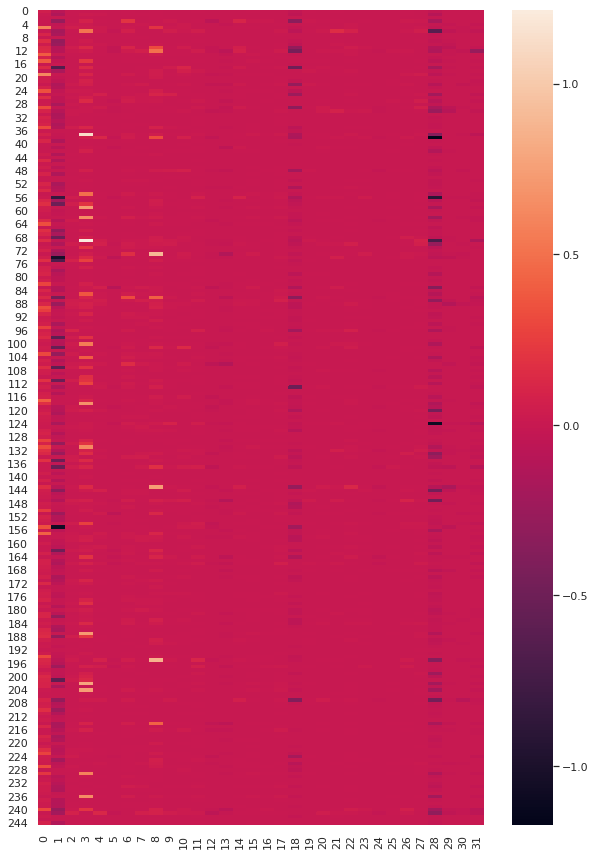

In [ ]:
plt_heatmap = plt.figure(figsize=(10,15))
sns.heatmap(ContributionCentrée)
plt.show

In [ ]:
Vecteur_Propre= pd.DataFrame(acp["vecteur propre"],columns=["X" + str(i) for i in range(1,33)]) # matrice des vecteurs propres

X_centree = centrer_data(df) # matrice de nos donnees initiales centrees
n = X_centree.shape[0]
p = X_centree.shape[1]



#Changement de Base 
X_centree_nouvelle_base = X_centree.dot(vecteur_propre)# .dot permet de faire le produit matriciel sur des dataframes
#Recuperation des coordonnes dans les deux composantes du premier plan factoriel
CP1 = pd.Series(X_centree_nouvelle_base.iloc[:,1],name="CP1")
CP2 = pd.Series(X_centree_nouvelle_base.iloc[:,2],name="CP2")
CP3 = pd.Series(X_centree_nouvelle_base.iloc[:,3],name="CP3")
CP4 = pd.Series(X_centree_nouvelle_base.iloc[:,4],name="CP4")
col_list = y_train["class"]

df_proj = pd.DataFrame()
df_proj = df_proj.append(CP1)
df_proj = df_proj.append(CP2)
df_proj = df_proj.append(CP3)
df_proj = df_proj.append(CP4)
df_proj = df_proj.append(col_list)
df_proj = df_proj.T



In [ ]:
df_proj

CP1   CP2   CP3   CP4 class
213  0.27  0.27  0.24 -0.00     g
230 -0.06  0.06 -0.24  0.06     b
295  0.13  0.28  0.18  0.18     g
186  0.12 -0.73 -0.41  1.51     b
93   0.31  0.07 -0.86  0.70     b
..    ...   ...   ...   ...   ...
204  0.21 -0.64 -0.65  0.67     b
53  -0.00 -0.21 -1.74  0.14     b
294  0.41  0.36  0.25  0.12     g
211 -0.14  0.39 -0.00  0.14     g
303  0.18  0.59  0.34  0.15     g

[245 rows x 5 columns]

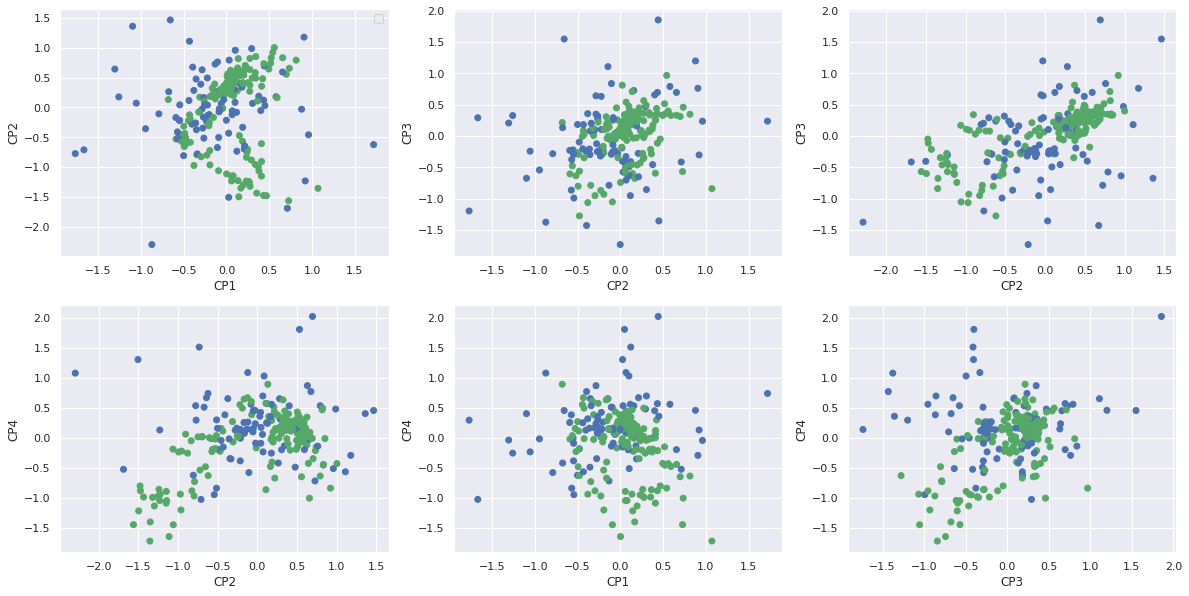

In [ ]:
sns.set(style="darkgrid")

# creation des deux graphes
fig, axs =  plt.subplots(2, 3, figsize = (20, 10) )


axs[0,0].scatter(df_proj["CP1"],df_proj["CP2"], c=df_proj["class"])
axs[0,0].set_xlabel("CP1")
axs[0,0].set_ylabel("CP2")

axs[0,1].scatter(df_proj["CP1"],df_proj["CP3"],c=df_proj["class"])
axs[0,1].set_xlabel("CP2")
axs[0,1].set_ylabel("CP3")

axs[1,1].scatter(df_proj["CP1"],df_proj["CP4"],c=df_proj["class"])
axs[1,1].set_xlabel("CP1")
axs[1,1].set_ylabel("CP4")

axs[0,2].scatter(df_proj["CP2"],df_proj["CP3"],c=df_proj["class"])
axs[0,2].set_xlabel("CP2")
axs[0,2].set_ylabel("CP3")

axs[1,0].scatter(df_proj["CP2"],df_proj["CP4"],c=df_proj["class"])
axs[1,0].set_xlabel("CP2")
axs[1,0].set_ylabel("CP4")

axs[1,2].scatter(df_proj["CP3"],df_proj["CP4"],c=df_proj["class"])
axs[1,2].set_xlabel("CP3")
axs[1,2].set_ylabel("CP4")

axs[0,0].legend()




## **Projection des individus du dataset test**

In [ ]:
#On prendra k de 9 à 11 pour traiter les cas centrée
Vecteur_Propre= pd.DataFrame(acp["vecteur propre"],columns=["X" + str(i) for i in range(1,33)]) # matrice des vecteurs propres

X_centree = centrer_data(X_test) # matrice de nos donnees initiales centrees
n = X_centree.shape[0]
p = X_centree.shape[1]

Vecteur_Propre.shape
#Changement de Base 
X_centree_nouvelle_base = X_centree.dot(Vecteur_Propre.to_numpy())# .dot permet de faire le produit matriciel sur des dataframes

#Qualité de la projection cas centrée, on utilise la formule de l'énoncé

Qualité_individus_centree =  [[0]*n,[0]*n,[0]*n]

for k in range(9,12): 
  for i in range (0,n):
   denominateur = sum(X_centree_nouvelle_base.iloc[i]**2)
   numerateur = 0
   for j in range(0,k):
      numerateur  = numerateur + X_centree_nouvelle_base.iloc[i,j]**2
   Qualité_individus_centree[k-9][i] = numerateur/denominateur 

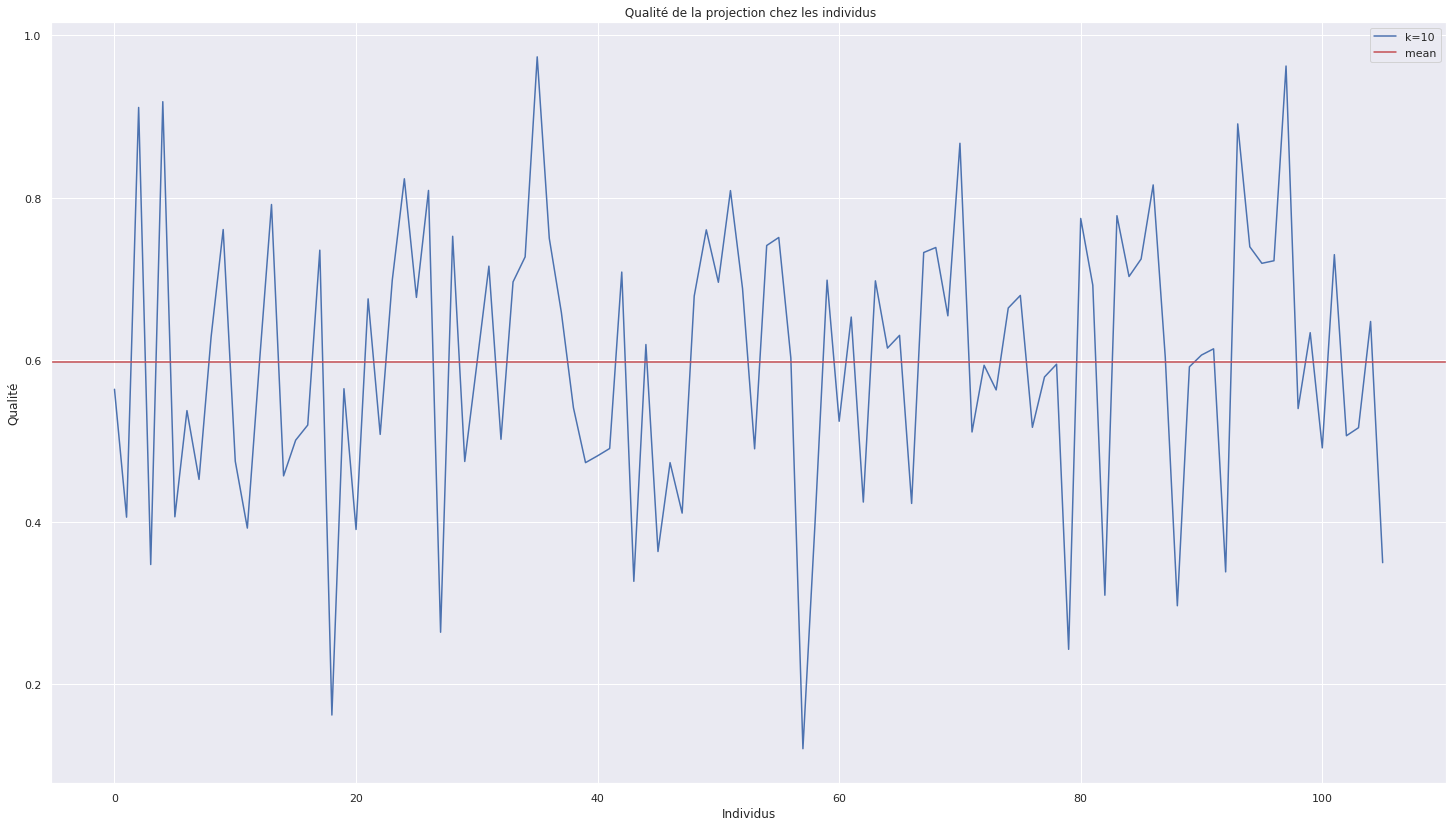

In [ ]:
#creation du graphique
fig = plt.figure(figsize=(25,14))
plt.plot(Qualité_individus_centree[1], label="k=10")
plt.axhline(np.mean(Qualité_individus_centree[1]), label='mean',color = 'r', linestyle = '-')
plt.title(" Qualité de la projection chez les individus")
plt.xlabel("Individus")
plt.ylabel("Qualité")
plt.legend(loc='best')

In [ ]:
df_proj_test = X_test.copy()
df_proj_test["qualite projection"] = Qualité_individus_centree[1]
df_proj_test

a01   a02  a03   a04  a05   a06   a07   a08   a09   a10  ...   a24  \
44   0.99 -0.06 1.00 -0.13 0.99 -0.19  0.99 -0.26  0.93 -0.30  ... -0.68   
7    0.00  0.00 0.00  0.00 1.00 -1.00  0.00  0.00 -1.00 -1.00  ...  1.00   
253  0.88  0.43 0.60  0.78 0.20  0.95 -0.24  0.93 -0.63  0.71  ... -0.56   
222  1.00 -1.00 1.00  1.00 1.00 -1.00  1.00  1.00  1.00 -1.00  ... -1.00   
90   0.88 -0.22 1.00  0.36 0.82  0.19  0.85  0.06  0.91 -0.04  ...  0.52   
..    ...   ...  ...   ...  ...   ...   ...   ...   ...   ...  ...   ...   
331  0.74  0.11 0.89  0.01 0.89  0.01  0.87 -0.01  0.73  0.11  ...  0.11   
80   1.00 -0.07 1.00  0.63 1.00  0.10  1.00  0.20  1.00 -1.00  ... -0.58   
281  0.94  0.20 0.96  0.41 0.81  0.57  0.57  0.71  0.42  0.83  ...  0.31   
9   -0.02 -0.08 0.00  0.00 0.00  0.00  0.11 -0.27 -0.46 -0.38  ... -0.01   
29  -1.00 -1.00 1.00  1.00 1.00 -1.00 -1.00  1.00  1.00 -1.00  ...  1.00   

      a25   a26   a27   a28   a29   a30   a31   a32  qualite projection  
44   0.65 -0.73  0.61 -0.75  0.55 -0.80  0.49 -0.83                0.56  
7    1.00  1.00  0.00  0.00  1.00  1.00  0.00  0.00                0.41  
253  0.72 -0.24  0.72  0.10  0.58  0.39  0.35  0.58                0.91  
222  1.00 -1.00  1.00  1.00  1.00 -1.00  1.00  1.00                0.35  
90   0.70  0.53  0.81  0.59  0.43  0.71  0.52  0.54                0.92  
..    ...   ...   ...   ...   ...   ...   ...   ...                 ...  
331  0.83  0.06  0.74 -0.04  0.82  0.07  0.81  0.07                0.73  
80   1.00 -0.81  1.00 -1.00  1.00 -0.79  1.00 -0.48                0.51  
281 -0.77  0.16 -0.75 -0.04 -0.75 -0.18 -0.67 -0.34                0.52  
9    0.21 -0.02  0.00  0.00  0.17  0.24 -0.08  0.38                0.65  
29   1.00 -1.00  1.00 -1.00 -1.00  1.00  1.00 -1.00                0.35  

[106 rows x 33 columns]

In [ ]:
df_proj_test = df_proj_test.sort_values(by="qualite projection" , ascending=True)
indivius_plus_mal_proj = df_proj_test.iloc[:5]

In [ ]:
indivius_plus_mal_proj

a01  a02   a03   a04   a05   a06   a07  a08   a09   a10  ...   a24  a25  \
218  1.00 1.00  1.00 -1.00  1.00 -1.00  1.00 1.00  0.00  0.00  ...  0.00 1.00   
224  0.00 0.00  1.00  1.00  0.00  0.00  1.00 1.00  0.00  0.00  ...  0.00 1.00   
166  0.00 0.00 -1.00 -1.00 -1.00  1.00  0.00 0.00 -1.00  1.00  ...  0.44 1.00   
182 -1.00 1.00  1.00 -1.00  0.00  0.00  0.00 0.00  1.00 -1.00  ...  1.00 1.00   
23  -1.00 1.00  0.00  0.00  0.00  0.00 -1.00 1.00  1.00  1.00  ... -1.00 1.00   

      a26   a27  a28   a29   a30   a31  a32  qualite projection  
218  1.00  0.00 0.00 -1.00 -1.00  0.00 0.00                0.12  
224 -1.00  0.00 0.00 -1.00  1.00  0.00 0.00                0.16  
166 -1.00  0.00 0.00 -1.00 -1.00 -1.00 1.00                0.24  
182 -1.00 -1.00 1.00 -1.00 -1.00  0.00 0.00                0.26  
23  -1.00  1.00 1.00 -1.00  1.00  0.00 0.00                0.30  

[5 rows x 33 columns]

In [ ]:
df_comparaison = pd.concat([indivius_plus_mal_proj,df.describe().loc[["min","mean","max"]]])
df_comparaison

a01   a02   a03   a04   a05   a06   a07   a08   a09   a10  ...   a24  \
218   1.00  1.00  1.00 -1.00  1.00 -1.00  1.00  1.00  0.00  0.00  ...  0.00   
224   0.00  0.00  1.00  1.00  0.00  0.00  1.00  1.00  0.00  0.00  ...  0.00   
166   0.00  0.00 -1.00 -1.00 -1.00  1.00  0.00  0.00 -1.00  1.00  ...  0.44   
182  -1.00  1.00  1.00 -1.00  0.00  0.00  0.00  0.00  1.00 -1.00  ...  1.00   
23   -1.00  1.00  0.00  0.00  0.00  0.00 -1.00  1.00  1.00  1.00  ... -1.00   
min  -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00  ... -1.00   
mean  0.64  0.04  0.60  0.12  0.55  0.12  0.51  0.18  0.48  0.16  ... -0.07   
max   1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  ...  1.00   

       a25   a26   a27   a28   a29   a30   a31   a32  qualite projection  
218   1.00  1.00  0.00  0.00 -1.00 -1.00  0.00  0.00                0.12  
224   1.00 -1.00  0.00  0.00 -1.00  1.00  0.00  0.00                0.16  
166   1.00 -1.00  0.00  0.00 -1.00 -1.00 -1.00  1.00                0.24  
182   1.00 -1.00 -1.00  1.00 -1.00 -1.00  0.00  0.00                0.26  
23    1.00 -1.00  1.00  1.00 -1.00  1.00  0.00  0.00                0.30  
min  -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00                 NaN  
mean  0.54 -0.07  0.38 -0.03  0.35 -0.00  0.35  0.01                 NaN  
max   1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00                 NaN  

[8 rows x 33 columns]

In [ ]:
df_proj_test.head(10)

a01   a02   a03   a04   a05   a06   a07   a08   a09   a10  ...   a24  \
218  1.00  1.00  1.00 -1.00  1.00 -1.00  1.00  1.00  0.00  0.00  ...  0.00   
224  0.00  0.00  1.00  1.00  0.00  0.00  1.00  1.00  0.00  0.00  ...  0.00   
166  0.00  0.00 -1.00 -1.00 -1.00  1.00  0.00  0.00 -1.00  1.00  ...  0.44   
182 -1.00  1.00  1.00 -1.00  0.00  0.00  0.00  0.00  1.00 -1.00  ...  1.00   
23  -1.00  1.00  0.00  0.00  0.00  0.00 -1.00  1.00  1.00  1.00  ... -1.00   
220  1.00 -1.00 -1.00  1.00 -1.00  1.00  1.00  1.00  1.00  1.00  ...  0.00   
13   1.00 -0.87  1.00  0.22  0.85 -0.40  1.00 -0.12  1.00  0.35  ... -0.17   
122  0.74  0.83 -0.76 -0.24  0.33 -0.14  0.45 -0.14 -0.67  0.13  ... -0.10   
222  1.00 -1.00  1.00  1.00  1.00 -1.00  1.00  1.00  1.00 -1.00  ... -1.00   
29  -1.00 -1.00  1.00  1.00  1.00 -1.00 -1.00  1.00  1.00 -1.00  ...  1.00   

     a25   a26   a27   a28   a29   a30   a31   a32  qualite projection  
218 1.00  1.00  0.00  0.00 -1.00 -1.00  0.00  0.00                0.12  
224 1.00 -1.00  0.00  0.00 -1.00  1.00  0.00  0.00                0.16  
166 1.00 -1.00  0.00  0.00 -1.00 -1.00 -1.00  1.00                0.24  
182 1.00 -1.00 -1.00  1.00 -1.00 -1.00  0.00  0.00                0.26  
23  1.00 -1.00  1.00  1.00 -1.00  1.00  0.00  0.00                0.30  
220 1.00 -1.00  1.00 -1.00 -1.00  1.00 -1.00  1.00                0.31  
13  1.00  0.36  1.00 -0.66  1.00  0.88  1.00 -0.19                0.33  
122 0.25 -0.51  1.00  0.00 -0.67 -0.05  0.26  0.02                0.34  
222 1.00 -1.00  1.00  1.00  1.00 -1.00  1.00  1.00                0.35  
29  1.00 -1.00  1.00 -1.00 -1.00  1.00  1.00 -1.00                0.35  

[10 rows x 33 columns]

In [ ]:
df_comparaison_isolation_acp = pd.merge(df_proj_test["qualite projection"], X_test_with_score,  left_index=True, right_index=True)
df_comparaison_isolation_acp = df_comparaison_isolation_acp[["qualite projection","score"]]
df_comparaison_isolation_acp

qualite projection  score
218                0.12   0.02
224                0.16   0.11
166                0.24  -0.04
182                0.26   0.02
23                 0.30   0.03
..                  ...    ...
167                0.89   0.05
253                0.91   0.11
90                 0.92   0.17
74                 0.96   0.17
70                 0.97   0.16

[106 rows x 2 columns]

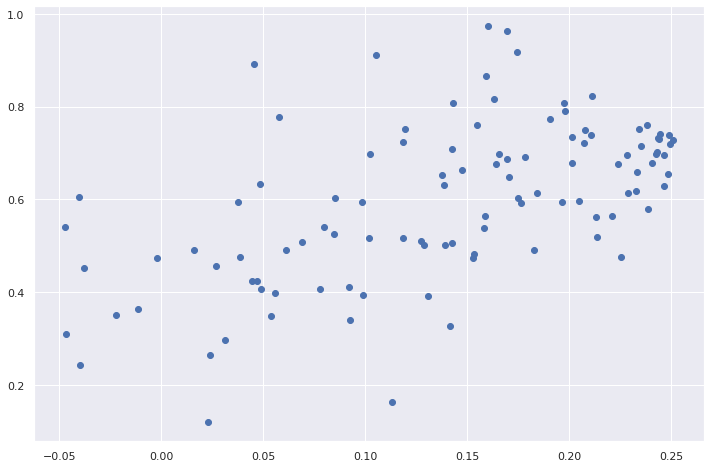

In [ ]:

fig = plt.figure(figsize = (12,8))
plt.scatter(df_comparaison_isolation_acp["score"],df_comparaison_isolation_acp["qualite projection"])




# **5) AFD**

## Matrices de variance interclasse, intraclasse et totale

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import IsolationForest
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/MyDrive/Ionosphere.csv", sep=";")

In [ ]:
# On crée notre jeu de données train et test avec une proportion 70-30
seed = 1234
#y = df[['class']]
#X =  df.drop(columns=['class'])


#X_train, X_test, y_train, y_test = train_test_split(X,
 #   y,test_size=0.3,
  #  shuffle=True,       #on mélange nos données avant de faire nos data test et data train                
   # random_state=seed)   
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3,random_state=seed)

In [ ]:
train

a01   a02   a03  a04  a05   a06   a07   a08   a09   a10  ...   a24  \
213  1.00  0.14  1.00 0.71 1.00  0.71  1.00 -0.14  0.86 -0.14  ... -0.29   
230  0.00  0.00  0.00 0.00 0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
295  0.47  0.11  0.59 0.01 0.55  0.07  0.48 -0.14  0.53  0.01  ... -0.20   
186  1.00  1.00  0.00 0.00 1.00 -1.00 -1.00 -1.00  1.00  1.00  ... -1.00   
93  -0.54  0.15 -0.34 0.73 0.52 -0.14  0.32 -0.07  0.21 -0.15  ...  0.66   
..    ...   ...   ...  ...  ...   ...   ...   ...   ...   ...  ...   ...   
204  0.00  0.00 -1.00 1.00 1.00  1.00 -1.00 -1.00  0.00  0.00  ... -1.00   
53  -0.68 -1.00 -1.00 1.00 1.00  0.63  0.04 -1.00 -1.00 -1.00  ...  1.00   
294  0.75 -0.13  0.54 0.17 0.73  0.09  0.70 -0.11  0.67 -0.24  ... -0.10   
211  0.45  0.09  0.64 0.09 0.27  0.18  0.64  0.00  0.36 -0.09  ... -0.09   
303  0.94 -0.02  0.94 0.01 0.95 -0.01  0.96 -0.01  0.95 -0.04  ... -0.04   

      a25   a26   a27   a28   a29   a30  a31   a32  class  
213  1.00  0.05  1.00  0.05  1.00  0.57 1.00  0.00      g  
230  1.00  1.00  0.00  0.00  0.00  0.00 0.00  0.00      b  
295  0.54 -0.11  0.60 -0.03  0.54 -0.12 0.56 -0.04      g  
186  1.00  1.00 -1.00  1.00 -1.00  1.00 0.00  0.00      b  
93   0.41 -0.40 -0.15  0.11  0.02  0.56 0.53 -0.09      b  
..    ...   ...   ...   ...   ...   ...  ...   ...    ...  
204 -1.00 -1.00  0.00  0.00  1.00 -1.00 0.00  0.00      b  
53   1.00 -1.00 -1.00 -1.00 -1.00  1.00 1.00  0.34      b  
294  0.62 -0.12  0.60 -0.21  0.38  0.07 0.61 -0.01      g  
211  0.34 -0.02  0.27  0.00  0.36  0.00 0.29 -0.02      g  
303  0.93 -0.06  0.90 -0.07  0.92 -0.07 0.92 -0.07      g  

[245 rows x 33 columns]

On détermine les matrices de variance intraclasse W, interclasse B et total Epsilon.

In [ ]:
#Calcul des variances intraclasses Wk puis de W
#Matrice de variance intraclasse pour la classe b
dfb = train[train['class'] == "b"]
dfb=dfb.drop(columns=['class'])
dfb
Wb=np.cov(dfb,rowvar=False)
Wb

array([[ 0.42331978,  0.11153271,  0.13944304, ...,  0.00836581,
         0.08153622,  0.01949134],
       [ 0.11153271,  0.38948195,  0.02182868, ..., -0.08589568,
        -0.07585302, -0.01691725],
       [ 0.13944304,  0.02182868,  0.4115781 , ...,  0.01871635,
         0.1007903 ,  0.00352862],
       ...,
       [ 0.00836581, -0.08589568,  0.01871635, ...,  0.42302079,
         0.04211338,  0.09923625],
       [ 0.08153622, -0.07585302,  0.1007903 , ...,  0.04211338,
         0.3319395 , -0.02144761],
       [ 0.01949134, -0.01691725,  0.00352862, ...,  0.09923625,
        -0.02144761,  0.33042741]])

In [ ]:
#MAtrice de variance intraclasse pour la classe g
dfg = train[train['class'] == "g"]
dfg=dfg.drop(columns=['class'])
dfg
Wg=np.cov(dfg,rowvar=False)
Wg

array([[ 0.04028357,  0.00483021,  0.02824966, ..., -0.00390574,
         0.01586499, -0.00247118],
       [ 0.00483021,  0.06467073, -0.01005693, ...,  0.00551954,
        -0.02807249,  0.02641291],
       [ 0.02824966, -0.01005693,  0.04505928, ..., -0.01282497,
         0.02349174, -0.01865784],
       ...,
       [-0.00390574,  0.00551954, -0.01282497, ...,  0.15271143,
        -0.02636789,  0.13488146],
       [ 0.01586499, -0.02807249,  0.02349174, ..., -0.02636789,
         0.20297218, -0.0180696 ],
       [-0.00247118,  0.02641291, -0.01865784, ...,  0.13488146,
        -0.0180696 ,  0.15407105]])

In [ ]:
#Calcul de W (variance intraclasse totale)
nb=len(dfb)
ng=len(dfg)
p=len(dfb.columns)

W = (1/(nb+ng)) * (nb*Wb + ng*Wg)
W

array([[ 0.17317368,  0.04184944,  0.06682696, ...,  0.00035174,
         0.03864888,  0.00514847],
       [ 0.04184944,  0.17736034,  0.00100542, ..., -0.02619595,
        -0.04464941,  0.01138   ],
       [ 0.06682696,  0.00100542,  0.17221887, ..., -0.00188206,
         0.05030961, -0.0109605 ],
       ...,
       [ 0.00035174, -0.02619595, -0.00188206, ...,  0.24649223,
        -0.00260908,  0.12251475],
       [ 0.03864888, -0.04464941,  0.05030961, ..., -0.00260908,
         0.24771595, -0.01924156],
       [ 0.00514847,  0.01138   , -0.0109605 , ...,  0.12251475,
        -0.01924156,  0.21525591]])

In [ ]:
#Calcul de la matrice de variance inter-classe B 
#Calcul des centres des 2 classes
gb = [0]*p
for i in range(p):
  gb[i] = dfb.iloc[:,i].mean()

gg= [0]*p
for i in range(p):
  gg[i] = dfg.iloc[:,i].mean()

g = [0]*p
for i in range(p):
  g[i] = df.iloc[:,i].mean()

print(g)

[0.6413418518518519, 0.04437188034188035, 0.6010678917378918, 0.11588900284900285, 0.5500950712250713, 0.11936037037037038, 0.5118480911680912, 0.18134538461538463, 0.47618264957264955, 0.15504045584045584, 0.40080119658119656, 0.09341367521367522, 0.3441591452991453, 0.07113233618233618, 0.38194900284900285, -0.0036168091168091113, 0.3593896011396011, -0.024024700854700848, 0.33669547008547007, 0.008295897435897431, 0.36247549857549854, -0.05740575498575498, 0.39613467236467237, -0.0711868660968661, 0.5416407977207977, -0.06953760683760683, 0.37844518518518516, -0.027907094017094014, 0.3525137321937322, -0.003793760683760677, 0.3493636467236467, 0.014480113960113956]


In [ ]:
#Calcul de B (variance interclasse)
#moyennes conditionnelles des classes
difb=list(set(gb) - set(g))
difg=list(set(gg) - set(g))
inter=[difg,difb]
inter
#Variance des moyennes des classes
B=np.cov(inter,rowvar=False)
B

array([[ 0.1407767 ,  0.0946673 , -0.02761394, ..., -0.04005419,
         0.01256647,  0.1325178 ],
       [ 0.0946673 ,  0.06366038, -0.01856939, ..., -0.02693501,
         0.0084505 ,  0.08911349],
       [-0.02761394, -0.01856939,  0.00541659, ...,  0.0078568 ,
        -0.00246497, -0.02599392],
       ...,
       [-0.04005419, -0.02693501,  0.0078568 , ...,  0.01139633,
        -0.00357545, -0.03770434],
       [ 0.01256647,  0.0084505 , -0.00246497, ..., -0.00357545,
         0.00112175,  0.01182924],
       [ 0.1325178 ,  0.08911349, -0.02599392, ..., -0.03770434,
         0.01182924,  0.12474343]])

In [ ]:
#Calcul de la variance totale 
V = B + W
V

array([[ 0.31395038,  0.13651675,  0.03921302, ..., -0.03970245,
         0.05121536,  0.13766628],
       [ 0.13651675,  0.24102072, -0.01756396, ..., -0.05313096,
        -0.0361989 ,  0.10049349],
       [ 0.03921302, -0.01756396,  0.17763546, ...,  0.00597473,
         0.04784464, -0.03695442],
       ...,
       [-0.03970245, -0.05313096,  0.00597473, ...,  0.25788856,
        -0.00618453,  0.08481041],
       [ 0.05121536, -0.0361989 ,  0.04784464, ..., -0.00618453,
         0.2488377 , -0.00741232],
       [ 0.13766628,  0.10049349, -0.03695442, ...,  0.08481041,
        -0.00741232,  0.33999934]])

In [ ]:
#Pour obtenir les variances on prend les diagonales de ces matrices
Var_interclasse=np.diag(B)
Var_intraclasse=np.diag(W)
Var_totale=np.diag(V)
print(Var_interclasse)
print(Var_intraclasse)
print(Var_totale)

[1.40776701e-01 6.36603821e-02 5.41658991e-03 1.74952053e-02
 1.20232587e-01 2.55323528e-02 2.65564989e-02 2.72336905e-02
 1.22078177e-02 1.48912454e-01 1.37325844e-01 6.36720108e-06
 3.79131241e-03 1.47556387e-03 4.43362650e-02 1.26453244e-01
 1.15555951e-03 6.75581111e-03 3.79674470e-06 2.92441988e-02
 4.31263790e-04 7.32050222e-03 6.03722879e-02 4.78205973e-03
 7.44089557e-02 7.68544436e-02 6.72275543e-07 4.03709265e-05
 8.33426603e-02 1.13963323e-02 1.12174965e-03 1.24743430e-01]
[0.17317368 0.17736034 0.17221887 0.19635498 0.17358119 0.26332751
 0.24606157 0.22845038 0.30142005 0.21729133 0.39017743 0.2391628
 0.43908393 0.21107397 0.40445151 0.21828134 0.41511789 0.26623483
 0.35069496 0.26805471 0.33972259 0.27562138 0.3069331  0.24893752
 0.26228558 0.28003912 0.29927877 0.25325224 0.2675974  0.24649223
 0.24771595 0.21525591]
[0.31395038 0.24102072 0.17763546 0.21385018 0.29381378 0.28885987
 0.27261807 0.25568407 0.31362787 0.36620378 0.52750327 0.23916916
 0.44287524 0.21254

## Valeurs et vecteurs propres

In [ ]:
#Obtenir les vecteurs propres et valeurs propres associés U à V-1*B
#Diagonalisation de la matrice d = V^-1 * B
Vinv=np.linalg.inv(V)
d=np.dot(Vinv,B)
valp, U = np.linalg.eig(d)
valp

array([ 9.53861639e-01+0.00000000e+00j, -7.10017558e-16+0.00000000e+00j,
        2.79648797e-16+5.22096884e-16j,  2.79648797e-16-5.22096884e-16j,
       -5.60906315e-16+0.00000000e+00j,  5.92750896e-16+0.00000000e+00j,
        5.46264725e-16+0.00000000e+00j,  3.94536687e-16+7.17446405e-17j,
        3.94536687e-16-7.17446405e-17j, -2.22043843e-16+2.73793876e-16j,
       -2.22043843e-16-2.73793876e-16j, -9.64859952e-17+2.20197677e-16j,
       -9.64859952e-17-2.20197677e-16j, -2.23316338e-16+3.56318142e-17j,
       -2.23316338e-16-3.56318142e-17j, -6.18443157e-18+2.10733960e-16j,
       -6.18443157e-18-2.10733960e-16j,  1.36221337e-16+6.26010037e-17j,
        1.36221337e-16-6.26010037e-17j, -2.79072380e-17+6.32510306e-17j,
       -2.79072380e-17-6.32510306e-17j,  8.98852849e-17+0.00000000e+00j,
        5.20126739e-17+3.33347147e-17j,  5.20126739e-17-3.33347147e-17j,
        5.21331487e-17+0.00000000e+00j, -4.19806224e-17+0.00000000e+00j,
        2.07911532e-18+2.52693046e-17j,  2.07911532

## Projection des individus

In [ ]:
#projection des individus sur cet espace
#(np.dot(u, v)/np.dot(v, v))*v
dfnew=np.dot(df.drop(columns=['class']),U)
dfg_new=np.dot(dfg,U)
dfb_new=np.dot(dfb,U)
np.shape(dfnew)

(351, 32)

/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


<BarContainer object of 32 artists>

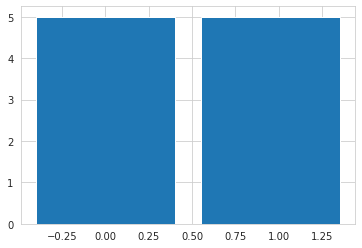

In [ ]:
import matplotlib.pyplot as plt
plt.bar(valp,height=5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


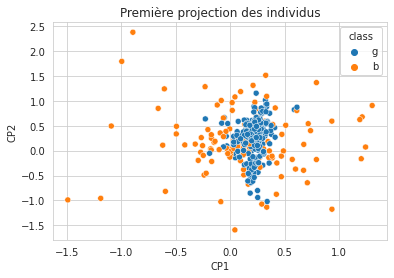

In [ ]:
#On projette sur les deux premiers plans
import seaborn as sns
plt.xlabel("CP1")
plt.ylabel("CP2")
plt.title("Première projection des individus")
sns.scatterplot(dfnew[:,0],dfnew[:,1], data=df, hue='class')
plt.show()

dfnew[:,1],

In [ ]:
#Avec un package python
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt

y = df[['class']]
X =  df.drop(columns=['class'])


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, shuffle=True,random_state=seed) 

#On utilise None pour pouvoir ensuite déterminer le nombre de composantes à conserver
lda = LinearDiscriminantAnalysis()
X_lda=lda.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Nombre de composantes et projection avec sklearn

In [ ]:
# fonction pour déterminer le nombre idéal de composantes
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components


In [ ]:
select_n_components(lda.explained_variance_ratio_, 0.95)

1

In [ ]:
#define data to plot
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = ['b','g']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


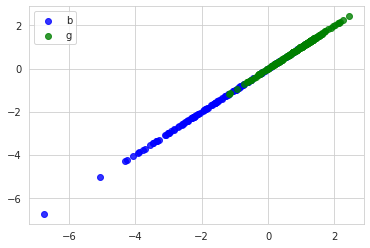

In [ ]:
#create LDA plot
plt.figure()
colors = ['blue', 'green']
lw = 2
for color, i, target_name in zip(colors, ["b", "g"], target_names):
    plt.scatter(data_plot[y == i], data_plot[y == i], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

In [ ]:
#Score grâce à la validation croisée 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))  

0.7961111111111111


On va améliorer ce score en modifiant les paramètres de la fonction sklearn
https://machinelearningmastery.com/linear-discriminant-analysis-with-python/

In [ ]:
#algo pour savoir si il vaut mieux utiliser svd, lsqr ou eigen en paramètres
# grid search solver for lda
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, shuffle=True,random_state=seed)
X=X_train
y=y_train
# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.796
Config: {'solver': 'svd'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# grid search shrinkage for lda
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define model
model = LinearDiscriminantAnalysis(solver='lsqr')
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8651058201058202


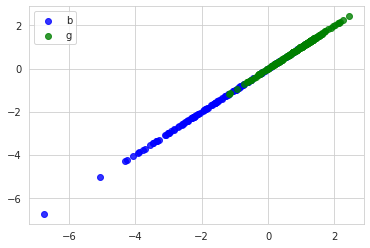

In [ ]:
#On utilise None pour pouvoir ensuite déterminer le nombre de composantes à conserver
lda_f = LinearDiscriminantAnalysis(solver="eigen",n_components=1,shrinkage=0.54)
X_ldaf=lda.fit(X_train, y_train)
#Score grâce à la validation croisée 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(lda_f, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))


lda_fit=lda_f.fit(X, y)
data_plot=lda.fit(X, y).transform(X)
target_names = ['b','g']
#create LDA plot
plt.figure()
colors = ['blue', 'green']
lw = 2
for color, i, target_name in zip(colors, ["b", "g"], target_names):
    plt.scatter(data_plot[y == i], data_plot[y == i], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

## Qualité de projection des individus

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


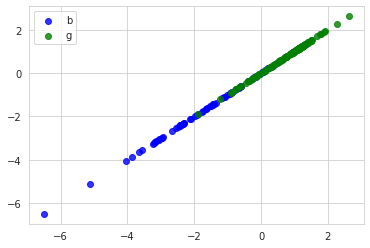

In [ ]:

#Qualité on calcule le score
#on améliore le modèle
#on regarde le sindividus les plus mal projetés
y = df[['class']]
X =  df.drop(columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, shuffle=True,random_state=seed) 

lda = LinearDiscriminantAnalysis()
lda_fit=lda.fit(X_train, y_train)
data_plot=lda.fit(X_train, y_train).transform(X_train)
target_names = ['b','g']
#create LDA plot
plt.figure()
colors = ['blue', 'green']
lw = 2
for color, i, target_name in zip(colors, ["b", "g"], target_names):
    plt.scatter(data_plot[y_train == i], data_plot[y_train == i], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

In [ ]:
#Qualité de la projection, on utilise la formule de l'énoncé

X_centree_nouvelle_base =np.dot(X_test,U).real
n = X_test.shape[0]
p = X_test.shape[1]
X_centree_nouvelle_base[0,:]
np.shape(X_centree_nouvelle_base)

In [ ]:
for i in range (0,n):
   denominateur = sum(X_centree_nouvelle_base[i,:]**2)

denominateur

In [ ]:
Qualité_individus_centree =  [[0]*n,[0]*n,[0]*n]


for k in range(0,3):
  for i in range (0,n):
   denominateur = sum(X_centree_nouvelle_base[i,:]**2)
   numerateur = 0
   for j in range(0,k):
      numerateur  = numerateur + X_centree_nouvelle_base[i,j]**2
      Qualité_individus_centree[k][i] = numerateur/denominateur
Qualité_individus_centree

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0.004391895501336142,
  0.11563236332399782,
  0.009657555687121658,
  0.022151296100616055,
  0.0046057297108355036,
  0.0026824728458842914,
  0.00856780943476916,
  0.027380655013895937,
  0.0052157879502440704,
  0.0043750863306086475,
  0.06137757570901617,
  0.019759633449537663,
  0.007016039919169295,
  0.05404514779128418,
  0.09699493334269035,
  0.005033300645514599,
  0.008162968355580554,
  0.0075243611417234535,
  0.0005510930049389998,
  0.00444277

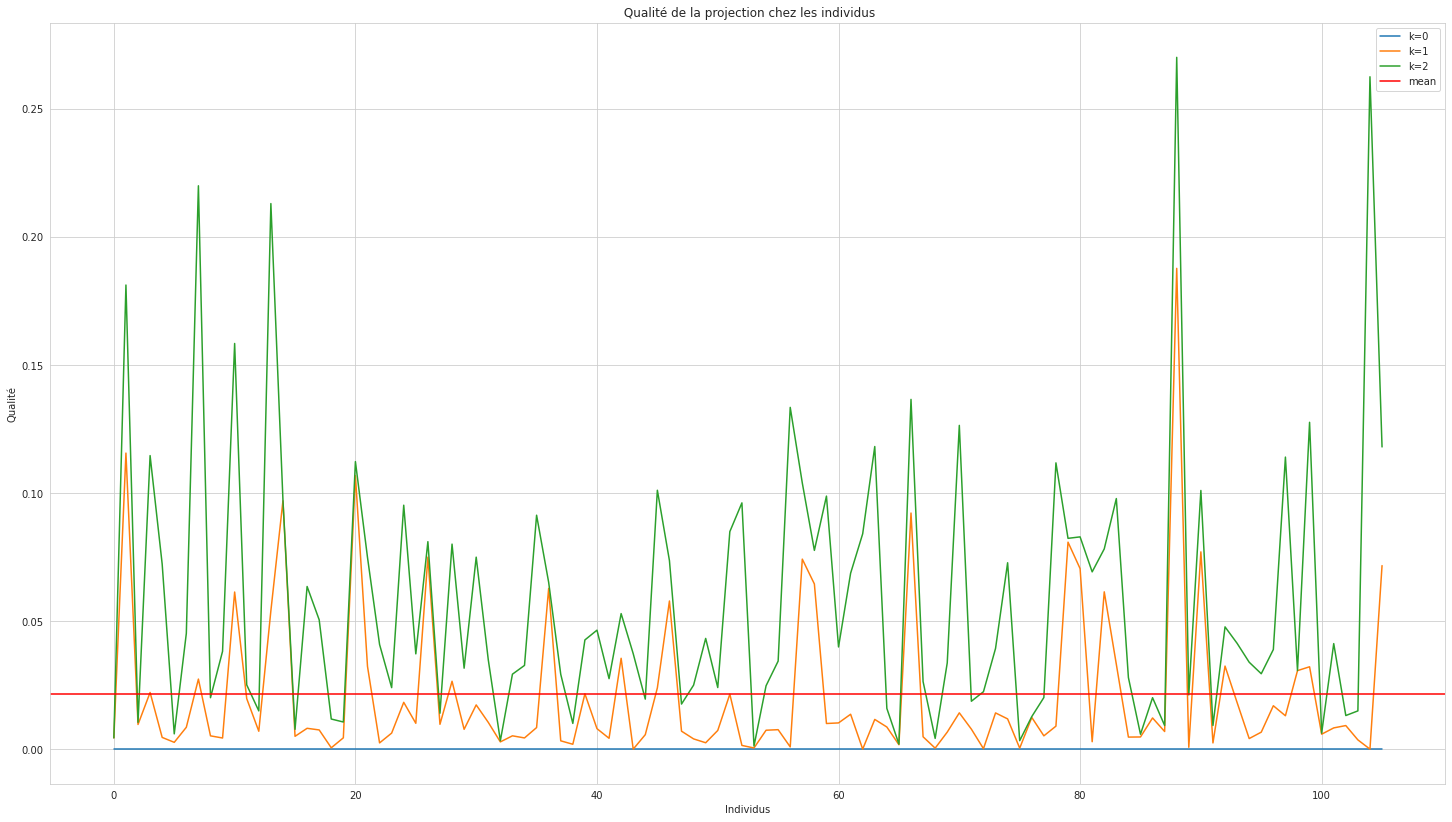

In [ ]:
#creation du graphique
fig = plt.figure(figsize=(25,14))
plt.plot(Qualité_individus_centree[0], label="k=0")
plt.plot(Qualité_individus_centree[1], label="k=1")
plt.plot(Qualité_individus_centree[2], label="k=2")
plt.axhline(np.mean(Qualité_individus_centree[1]), label='mean',color = 'r', linestyle = '-')
plt.title(" Qualité de la projection chez les individus")
plt.xlabel("Individus")
plt.ylabel("Qualité")
plt.legend(loc='best')

In [ ]:
df_proj_test = X_test.copy()
df_proj_test["qualite projection"] = Qualité_individus_centree[1]
df_proj_test

df_proj_test = df_proj_test.sort_values(by="qualite projection" , ascending=True)
indivius_plus_mal_proj = df_proj_test.iloc[:5]
indivius_plus_mal_proj

a01   a02   a03   a04   a05   a06  a07   a08   a09   a10  ...   a24  \
13   1.00 -0.87  1.00  0.22  0.85 -0.40 1.00 -0.12  1.00  0.35  ... -0.17   
100  1.00 -1.00  0.00  0.00  0.78 -0.99 0.81  0.55 -0.42 -0.95  ... -1.00   
9   -0.02 -0.08  0.00  0.00  0.00  0.00 0.11 -0.27 -0.46 -0.38  ... -0.01   
140  0.95 -0.04 -1.00 -0.33 -1.00 -0.02 0.97  0.01  0.93 -0.02  ... -0.00   
115  0.21 -0.10  0.33  0.07  0.19  0.19 0.24  0.10  0.40  0.02  ... -0.05   

      a25   a26  a27   a28   a29   a30   a31   a32  qualite projection  
13   1.00  0.36 1.00 -0.66  1.00  0.88  1.00 -0.19                0.00  
100 -1.00 -1.00 1.00 -1.00  1.00 -1.00  0.00  0.00                0.00  
9    0.21 -0.02 0.00  0.00  0.17  0.24 -0.08  0.38                0.00  
140  0.82  0.14 0.90 -0.07 -1.00 -0.19 -1.00 -0.34                0.00  
115  0.22 -0.02 0.19  0.00  0.17 -0.02  0.15 -0.02                0.00  

[5 rows x 33 columns]

In [ ]:
#on a deux groupes donc la droite discriminantes et V-1 (g1 - g2)
#projette les individus sur cette droite
#qualité de la projection?
df_proj=np.dot(X_test,U)
df_proj

array([[ 0.25765003+0.j        ,  0.0246832 +0.j        ,
        -0.92325411+0.01555617j, ...,  0.46284685+0.13500156j,
         0.46284685-0.13500156j,  0.37747573+0.j        ],
       [ 0.7166877 +0.j        ,  0.53991374+0.j        ,
         0.02189905-0.27890028j, ..., -0.01733045-0.05821464j,
        -0.01733045+0.05821464j, -0.00695527+0.j        ],
       [ 0.27190591+0.j        ,  0.08065816+0.j        ,
        -0.32035493+0.10392095j, ...,  0.76580458-0.02560224j,
         0.76580458+0.02560224j,  0.78643014+0.j        ],
       ...,
       [ 0.15102824+0.j        , -0.26656606+0.j        ,
        -0.23452777+0.28684815j, ..., -0.57684455-0.09570757j,
        -0.57684455+0.09570757j, -0.33759303+0.j        ],
       [-0.00507667+0.j        ,  0.43588162+0.j        ,
         0.19121076-0.05975503j, ...,  0.01719932+0.03553943j,
         0.01719932-0.03553943j,  0.01584068+0.j        ],
       [-1.19108941+0.j        , -0.95762018+0.j        ,
        -0.40937395-1.00969401

# 6) Mise en oeuvre de l'AFD prédictive sur les data ionoshpères

In [ ]:
#prédire le classe des data train
y = df[['class']]
X =  df.drop(columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, shuffle=True,random_state=seed) 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_fit=lda.fit(X_train, y_train)
data_plot=lda.fit(X_train, y_train).transform(X_train)

#prédictions
pred=lda_fit.predict(X_test)
pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['g', 'g', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'g', 'b', 'g', 'g',
       'b', 'b', 'g', 'g', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'b', 'g', 'g', 'g', 'g', 'b', 'g', 'g', 'g', 'b', 'g', 'b',
       'b', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'g', 'g', 'g', 'g',
       'g', 'b', 'g', 'g', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g',
       'g', 'g', 'g', 'b', 'g', 'g', 'g', 'b', 'g', 'g', 'b', 'g', 'g',
       'g', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'b',
       'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'g', 'g', 'g',
       'b', 'g'], dtype='<U1')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Matrice de confusion : AFD')

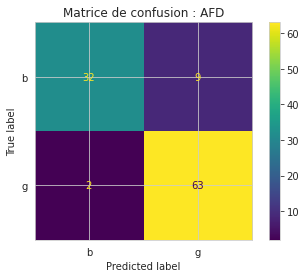

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lda_fit, X_test, y_test)
plt.title("Matrice de confusion : AFD")

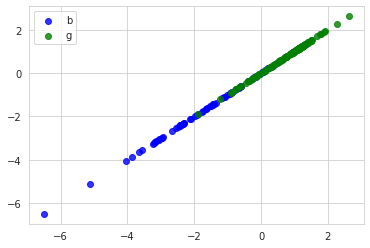

In [ ]:
target_names = ['b','g']
#create LDA plot
plt.figure()
colors = ['blue', 'green']
lw = 2
for color, i, target_name in zip(colors, ["b", "g"], target_names):
    plt.scatter(data_plot[y_train == i], data_plot[y_train == i], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

Question 6)a)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
LDA = LDA()
LDA.fit(X_train, y_train)
LDA_pred=LDA.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
tn, fp, fn, tp = confusion_matrix(list(y_test), list(LDA_pred), labels=[0, 1]).ravel()
 
print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

ValueError: ignored

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


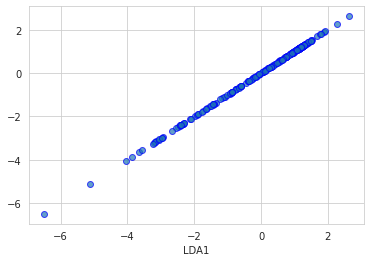

In [ ]:
plt.xlabel('LDA1')
plt.scatter(
X_lda[:,0],
X_lda[:,0],
cmap='rainbow',
   alpha=0.7,
edgecolors='b'
)

In [ ]:
X_lda.shape

(245, 1)

Question 6)b)

Creation du dataset des valeurs reduites

In [ ]:
df = pd.read_csv("drive/MyDrive/Ionosphere.csv", sep=";")

In [ ]:
def centrer_data(matrice):
  return matrice.apply(lambda x: x -x.mean())

In [ ]:
#Normalisation en utilisant la librairie pandas (donne des estimations non biaisées)
def normer_data(matrice):
  return df.apply(lambda x: (x-x.mean())/ x.std())

In [ ]:
def calcul_indicateurs_statistiques(matrice):
  resultat = {}
  resultat["ecart-type"]  = matrice.std()
  resultat["variance"]   = matrice.var()
  resultat["covariance"] = matrice.cov() 
  return resultat

In [ ]:
def ACP(matrice):

  acp = {}

  matrice = centrer_data(matrice) # on centre nos données

  # on cacule la matrice de covariance que l'on covertit en array
  matrice_cov = np.array(calcul_indicateurs_statistiques(matrice)["covariance"]) 

  # on calcule les vectuers propre et lambdas, ils ne sont pas triés
  lambdas,vecteur_propre=np.linalg.eig(matrice_cov) 
  
  # On les trie dans le sens décroissant en fonction de la variance
  index = lambdas.argsort()[::-1] 
  lambdas = lambdas[index]
  vecteur_propre = vecteur_propre[index]

  # calcul des variables expliquées
  total_lambdas = sum(lambdas)
  ratio_var_explique = [(i/total_lambdas) for i in lambdas]

  acp["lambdas"] = lambdas
  acp["vecteur propre"] = vecteur_propre
  acp["ratio_var_explique"] = ratio_var_explique
 
  return acp



In [ ]:

y = df[['class']]
X =  df.drop(columns=['class'])
acp = ACP(X)


#On prendra k de 9 à 11 pour traiter les cas centrée
Vecteur_Propre= pd.DataFrame(acp["vecteur propre"],columns=["X" + str(i) for i in range(1,33)]) # matrice des vecteurs propres

X_centree = centrer_data(X) # matrice de nos donnees initiales centrees
n = X_centree.shape[0]
p = X_centree.shape[1]

Vecteur_Propre.shape
#Changement de Base 
X_centree_nouvelle_base = X_centree.dot(Vecteur_Propre.to_numpy())# .dot permet de faire le produit matriciel sur des dataframes
X =  X_centree_nouvelle_base.iloc[:,0:10]

# On crée notre jeu de données train et test avec une proportion 70-30
X_train, X_test, y_train, y_test = train_test_split(X,
    y,test_size=0.3,
    shuffle=True,       #on mélange nos données avant de faire nos data test et data train                
    random_state=seed)   




Foret Aleatoire

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#definition des paramètres que l'on va tester dans la Grid search cross validation
n_estimators = [int(x) for x in np.linspace(start=5, stop=100, num=8)]
max_features = ['auto', 'sqrt'] # Il s'agit du nombre maximum de caractéristiques que Random Forest est autorisé à essayer dans un arbre individuel.
max_depth = [int(x) for x in np.linspace(2, 20, num=8)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

In [ ]:

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
rf_clf = RandomForestClassifier(random_state=seed, class_weight={'g':0.641, 'b':0.309})
# verbose de 1 à 3: controle le nb de message affiché / 3 est le max de msg
# n_jobs : nombre de job executer en parallele
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="roc_auc", cv=3, verbose=2, n_jobs=-1) # on baisse la cv à 3 car le 10 d'avant prend trop de temps


In [ ]:
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
Best parameters: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 45}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
#On entraine notre modèle avec les hyperparamètre trouvés
rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Résultat Train :
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              b      g  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   85.00 160.00      1.00     245.00        245.00
_______________________________________________
Confusion Matrix: 
 [[ 85   0]
 [  0 160]]

Résultat Test :
Accuracy Score: 89.62%
_______________________________________________
CLASSIFICATION REPORT:
              b     g  accuracy  macro avg  weighted avg
precision  0.88  0.91      0.90       0.89          0.90
recall     0.85  0.92      0.90       0.89          0.90
f1-score   0.86  0.92      0.90       0.89          0.90
support   41.00 65.00      0.90     106.00        106.00
_______________________________________________
Confusion Matrix: 
 [[35  6]
 [ 5 60]]



AFD

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_fit=lda.fit(X_train, y_train)
data_plot=lda.fit(X_train, y_train).transform(X_train)

#prédictions
pred=lda_fit.predict(X_test)
pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['g', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
       'b', 'b', 'g', 'g', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'b', 'g', 'g', 'g', 'g', 'b', 'g', 'g', 'g', 'b', 'g', 'b',
       'b', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'g', 'g', 'g', 'g',
       'g', 'b', 'g', 'g', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
       'g', 'g', 'g', 'b', 'g', 'g', 'g', 'b', 'b', 'g', 'b', 'g', 'g',
       'g', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'b',
       'g', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'g', 'g', 'g',
       'b', 'b'], dtype='<U1')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Matrice de confusion : AFD')

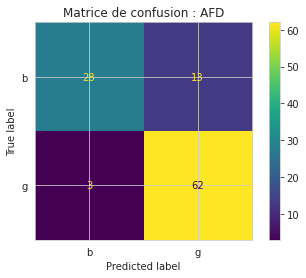

In [ ]:
#matrice de confusion
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lda_fit, X_test, y_test)
plt.title("Matrice de confusion : AFD")